## Решающие деревья, случайные леса и градиентный бустинг

### О задании

Задание состоит из трёх разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.  
3. В третьем разделе вы попробуете градиентный бустинг на практической задаче.

Прежде чем приступать к работе, рекомендую прочитать теорию.  
Построение решающего дерева осуществляется согласно базовому жадному алгоритму, описанному в [лекции 8](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения производиться по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

Построение случайного леса описано в лекции [8](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture08-ensembles.pdf), про градиентный бустинг [9](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture09-ensembles.pdf), про стекинг и блендинг в лекции  [10](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture10-ensembles.pdf)

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [40]:
from sklearn.datasets import make_moons, make_circles, make_classification
import seaborn as sns
from matplotlib.colors import Colormap, ListedColormap
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [41]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

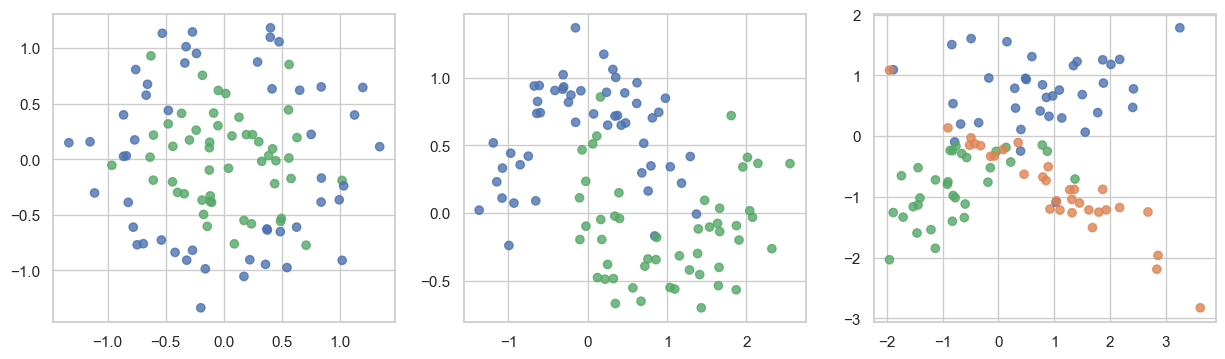

In [42]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1.1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [43]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

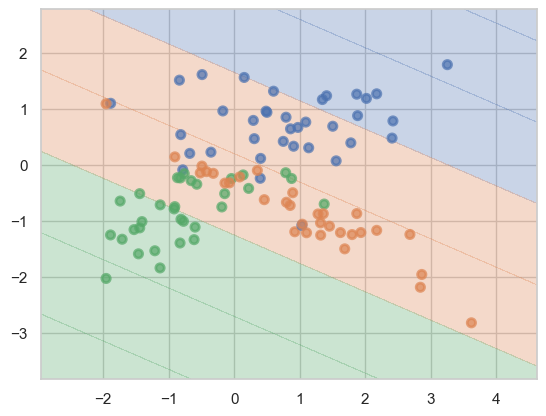

In [44]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [45]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

__Ответ:__

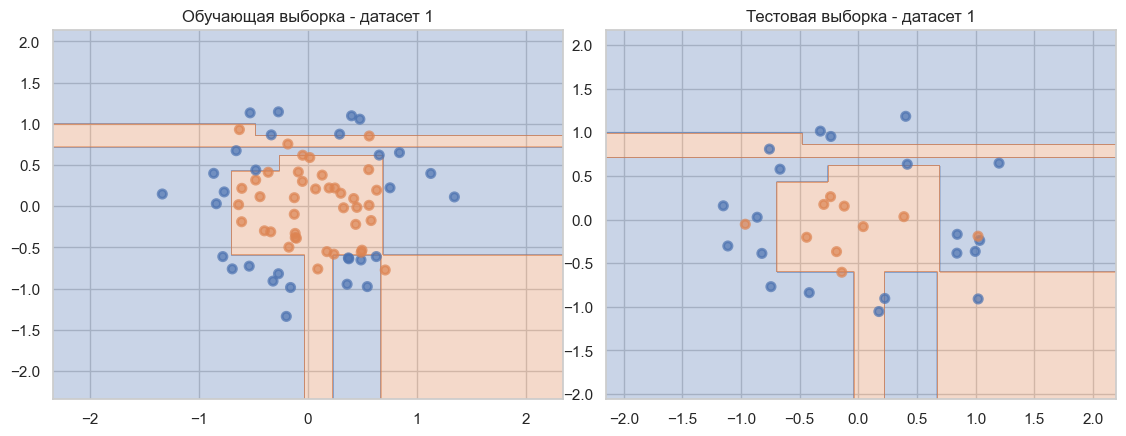

Датасет 1:
  Accuracy на обучающей выборке: 1.00
  Accuracy на тестовой выборке: 0.77


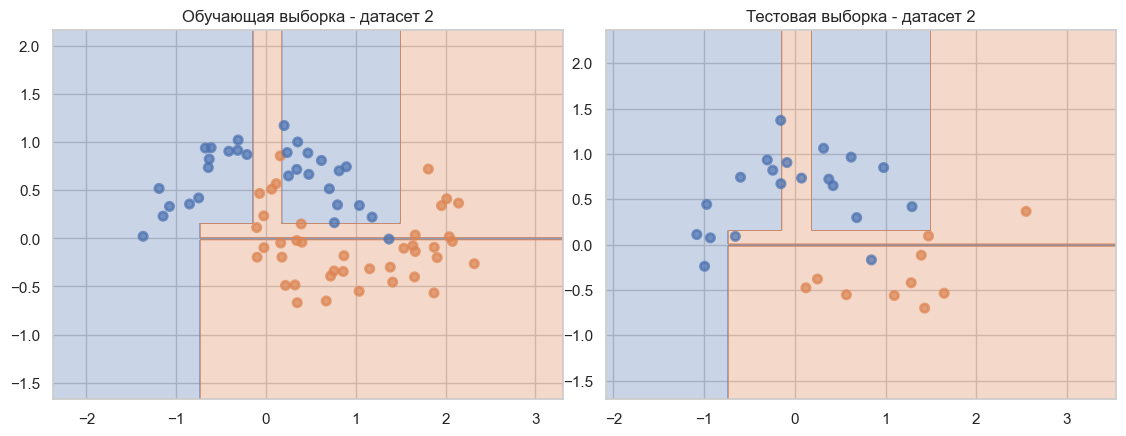

Датасет 2:
  Accuracy на обучающей выборке: 1.00
  Accuracy на тестовой выборке: 0.87


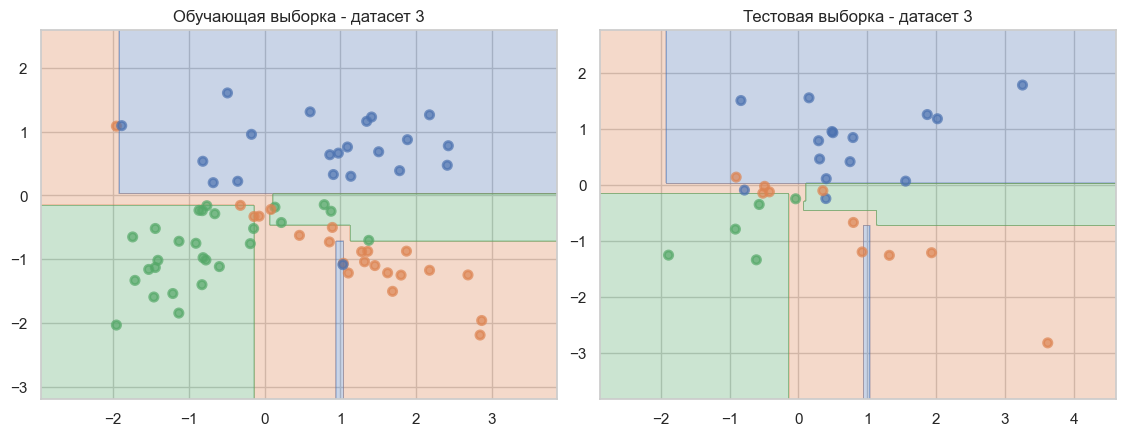

Датасет 3:
  Accuracy на обучающей выборке: 1.00
  Accuracy на тестовой выборке: 0.83


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score  # Добавьте эту строку

def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

for i, (X, y) in enumerate(datasets):
    # Разбиваем на обучающую и тестовую
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Обучаем решающее дерево
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)

    # Строим разделяющую поверхность по обучающей выборке
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plot_surface(clf, X_train, y_train)
    plt.title(f'Обучающая выборка - датасет {i+1}')

    # Строим разделяющую поверхность по тестовой выборке
    plt.subplot(1, 2, 2)
    plot_surface(clf, X_test, y_test)
    plt.title(f'Тестовая выборка - датасет {i+1}')
    plt.show()

    # Расчет accuracy на обучающей и тестовой выборках
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f'Датасет {i+1}:')
    print(f'  Accuracy на обучающей выборке: {train_acc:.2f}')
    print(f'  Accuracy на тестовой выборке: {test_acc:.2f}')

__1.2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?


ДАТАСЕТ: Circles
Параметры: max_depth=2, min_samples_leaf=1
  Глубина дерева: 2
  Число листьев: 4
  Обучающая accuracy: 0.829
  Тестовая accuracy: 0.633
  Разница (train - test): 0.195

Параметры: max_depth=3, min_samples_leaf=1
  Глубина дерева: 3
  Число листьев: 7
  Обучающая accuracy: 0.886
  Тестовая accuracy: 0.733
  Разница (train - test): 0.152

Параметры: max_depth=5, min_samples_leaf=1
  Глубина дерева: 5
  Число листьев: 12
  Обучающая accuracy: 0.971
  Тестовая accuracy: 0.767
  Разница (train - test): 0.205

Параметры: max_depth=None, min_samples_leaf=1
  Глубина дерева: 6
  Число листьев: 14
  Обучающая accuracy: 1.000
  Тестовая accuracy: 0.733
  Разница (train - test): 0.267

Параметры: max_depth=5, min_samples_leaf=2
  Глубина дерева: 5
  Число листьев: 12
  Обучающая accuracy: 0.943
  Тестовая accuracy: 0.833
  Разница (train - test): 0.110

Параметры: max_depth=5, min_samples_leaf=5
  Глубина дерева: 5
  Число листьев: 8
  Обучающая accuracy: 0.871
  Тестовая accur

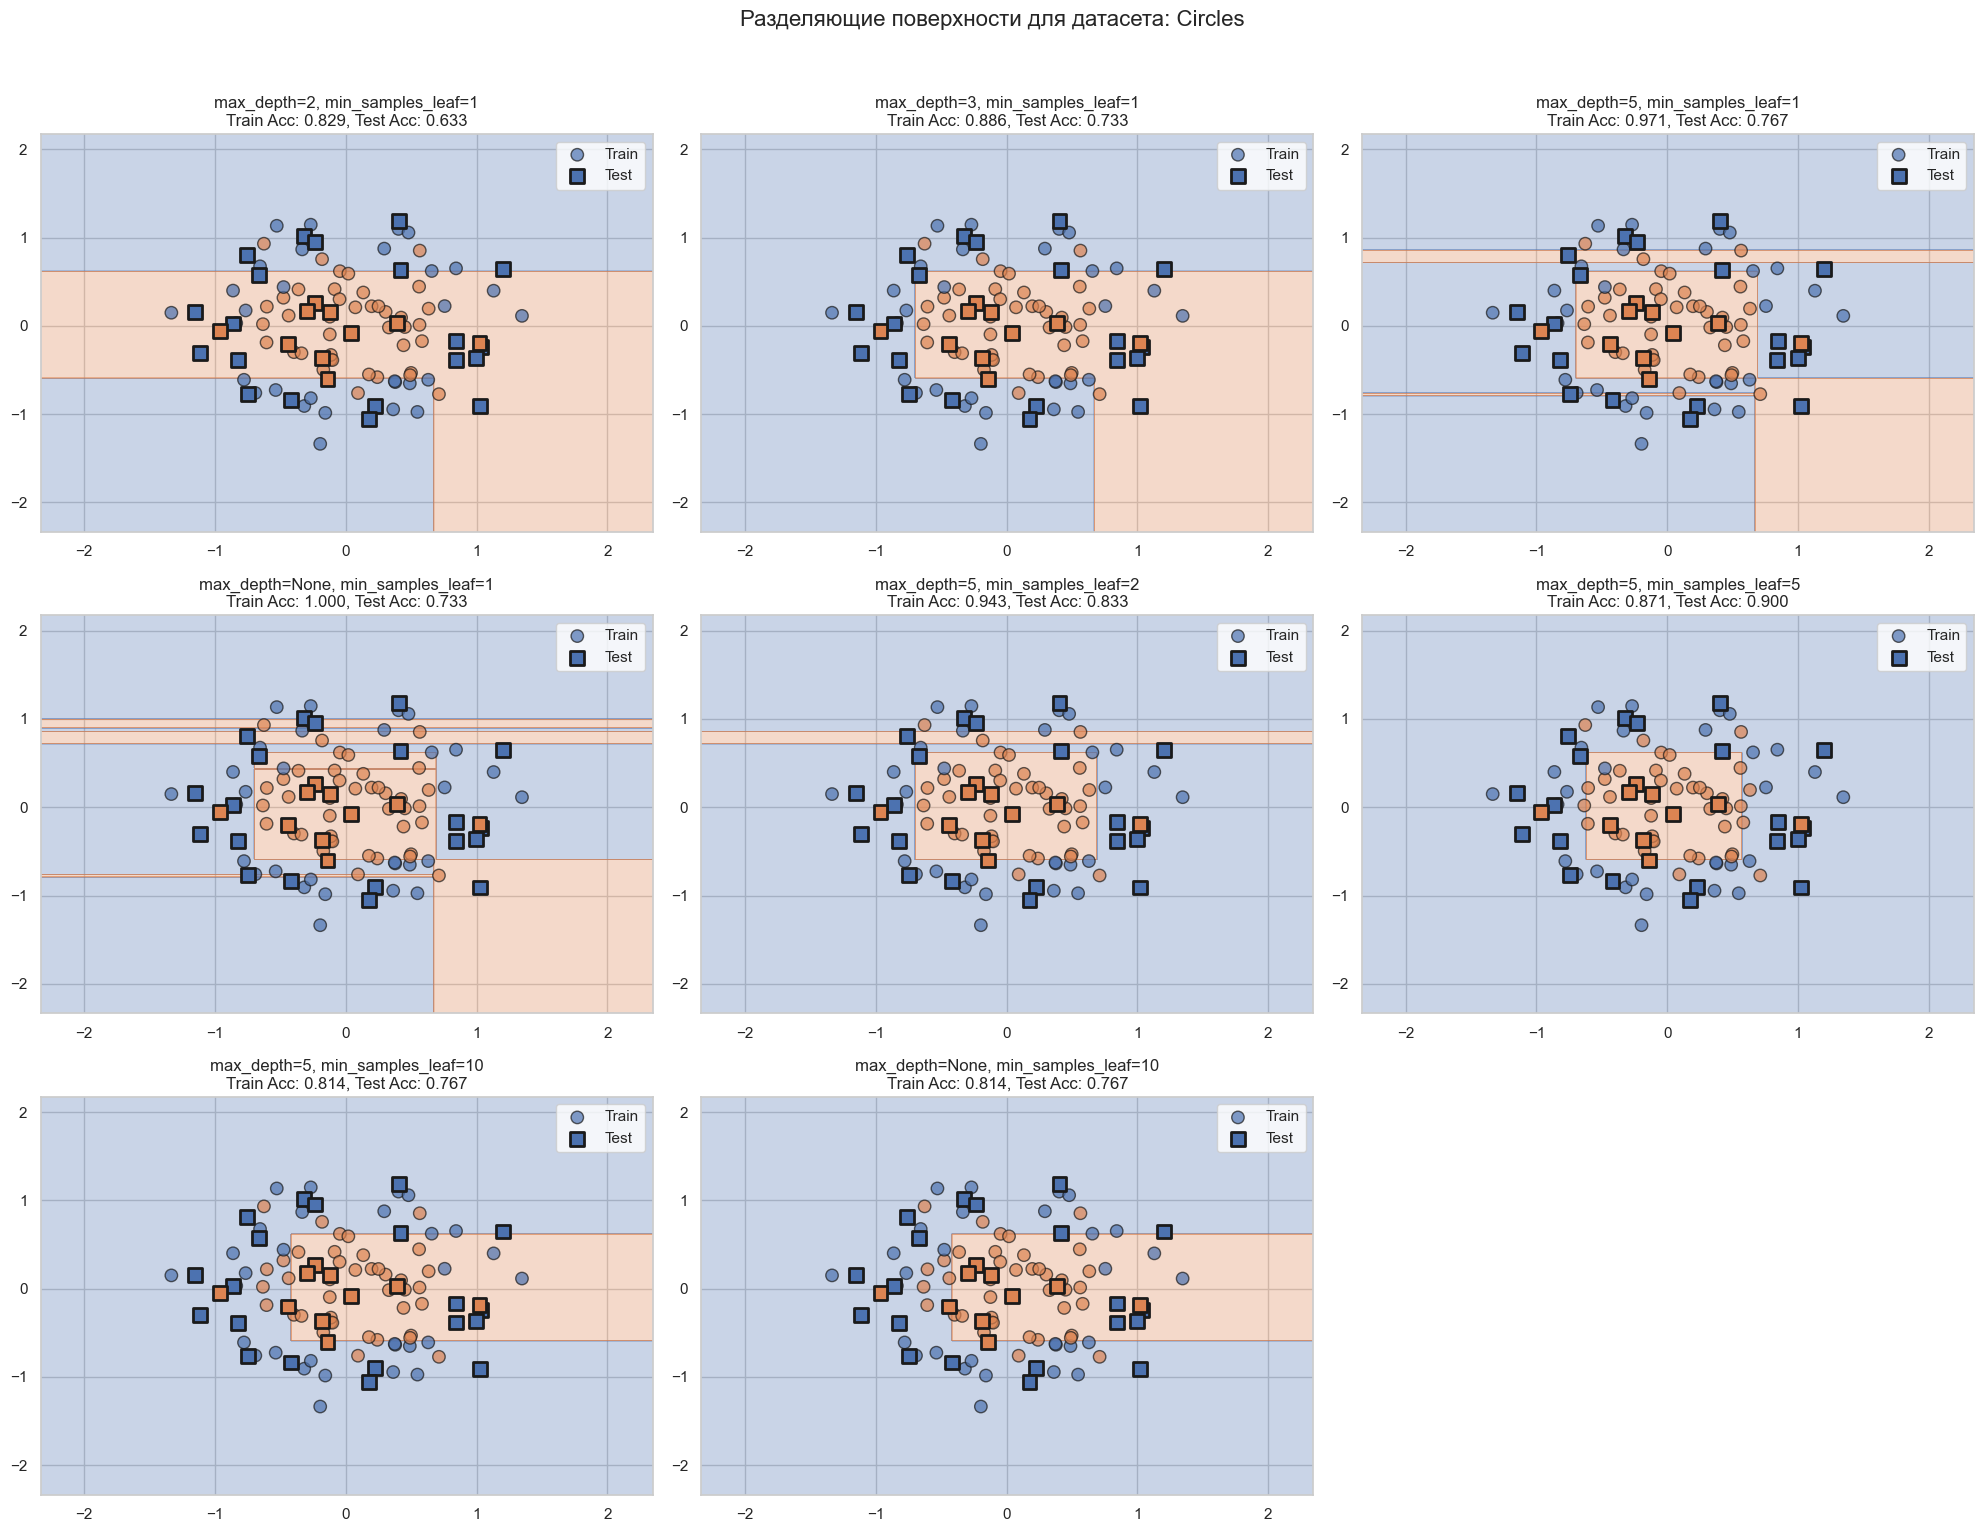


ДАТАСЕТ: Moons
Параметры: max_depth=2, min_samples_leaf=1
  Глубина дерева: 2
  Число листьев: 4
  Обучающая accuracy: 0.914
  Тестовая accuracy: 0.933
  Разница (train - test): -0.019

Параметры: max_depth=3, min_samples_leaf=1
  Глубина дерева: 3
  Число листьев: 6
  Обучающая accuracy: 0.914
  Тестовая accuracy: 0.933
  Разница (train - test): -0.019

Параметры: max_depth=5, min_samples_leaf=1
  Глубина дерева: 5
  Число листьев: 8
  Обучающая accuracy: 1.000
  Тестовая accuracy: 0.867
  Разница (train - test): 0.133

Параметры: max_depth=None, min_samples_leaf=1
  Глубина дерева: 4
  Число листьев: 8
  Обучающая accuracy: 1.000
  Тестовая accuracy: 0.867
  Разница (train - test): 0.133

Параметры: max_depth=5, min_samples_leaf=2
  Глубина дерева: 5
  Число листьев: 7
  Обучающая accuracy: 0.986
  Тестовая accuracy: 0.767
  Разница (train - test): 0.219

Параметры: max_depth=5, min_samples_leaf=5
  Глубина дерева: 5
  Число листьев: 6
  Обучающая accuracy: 0.957
  Тестовая accuracy

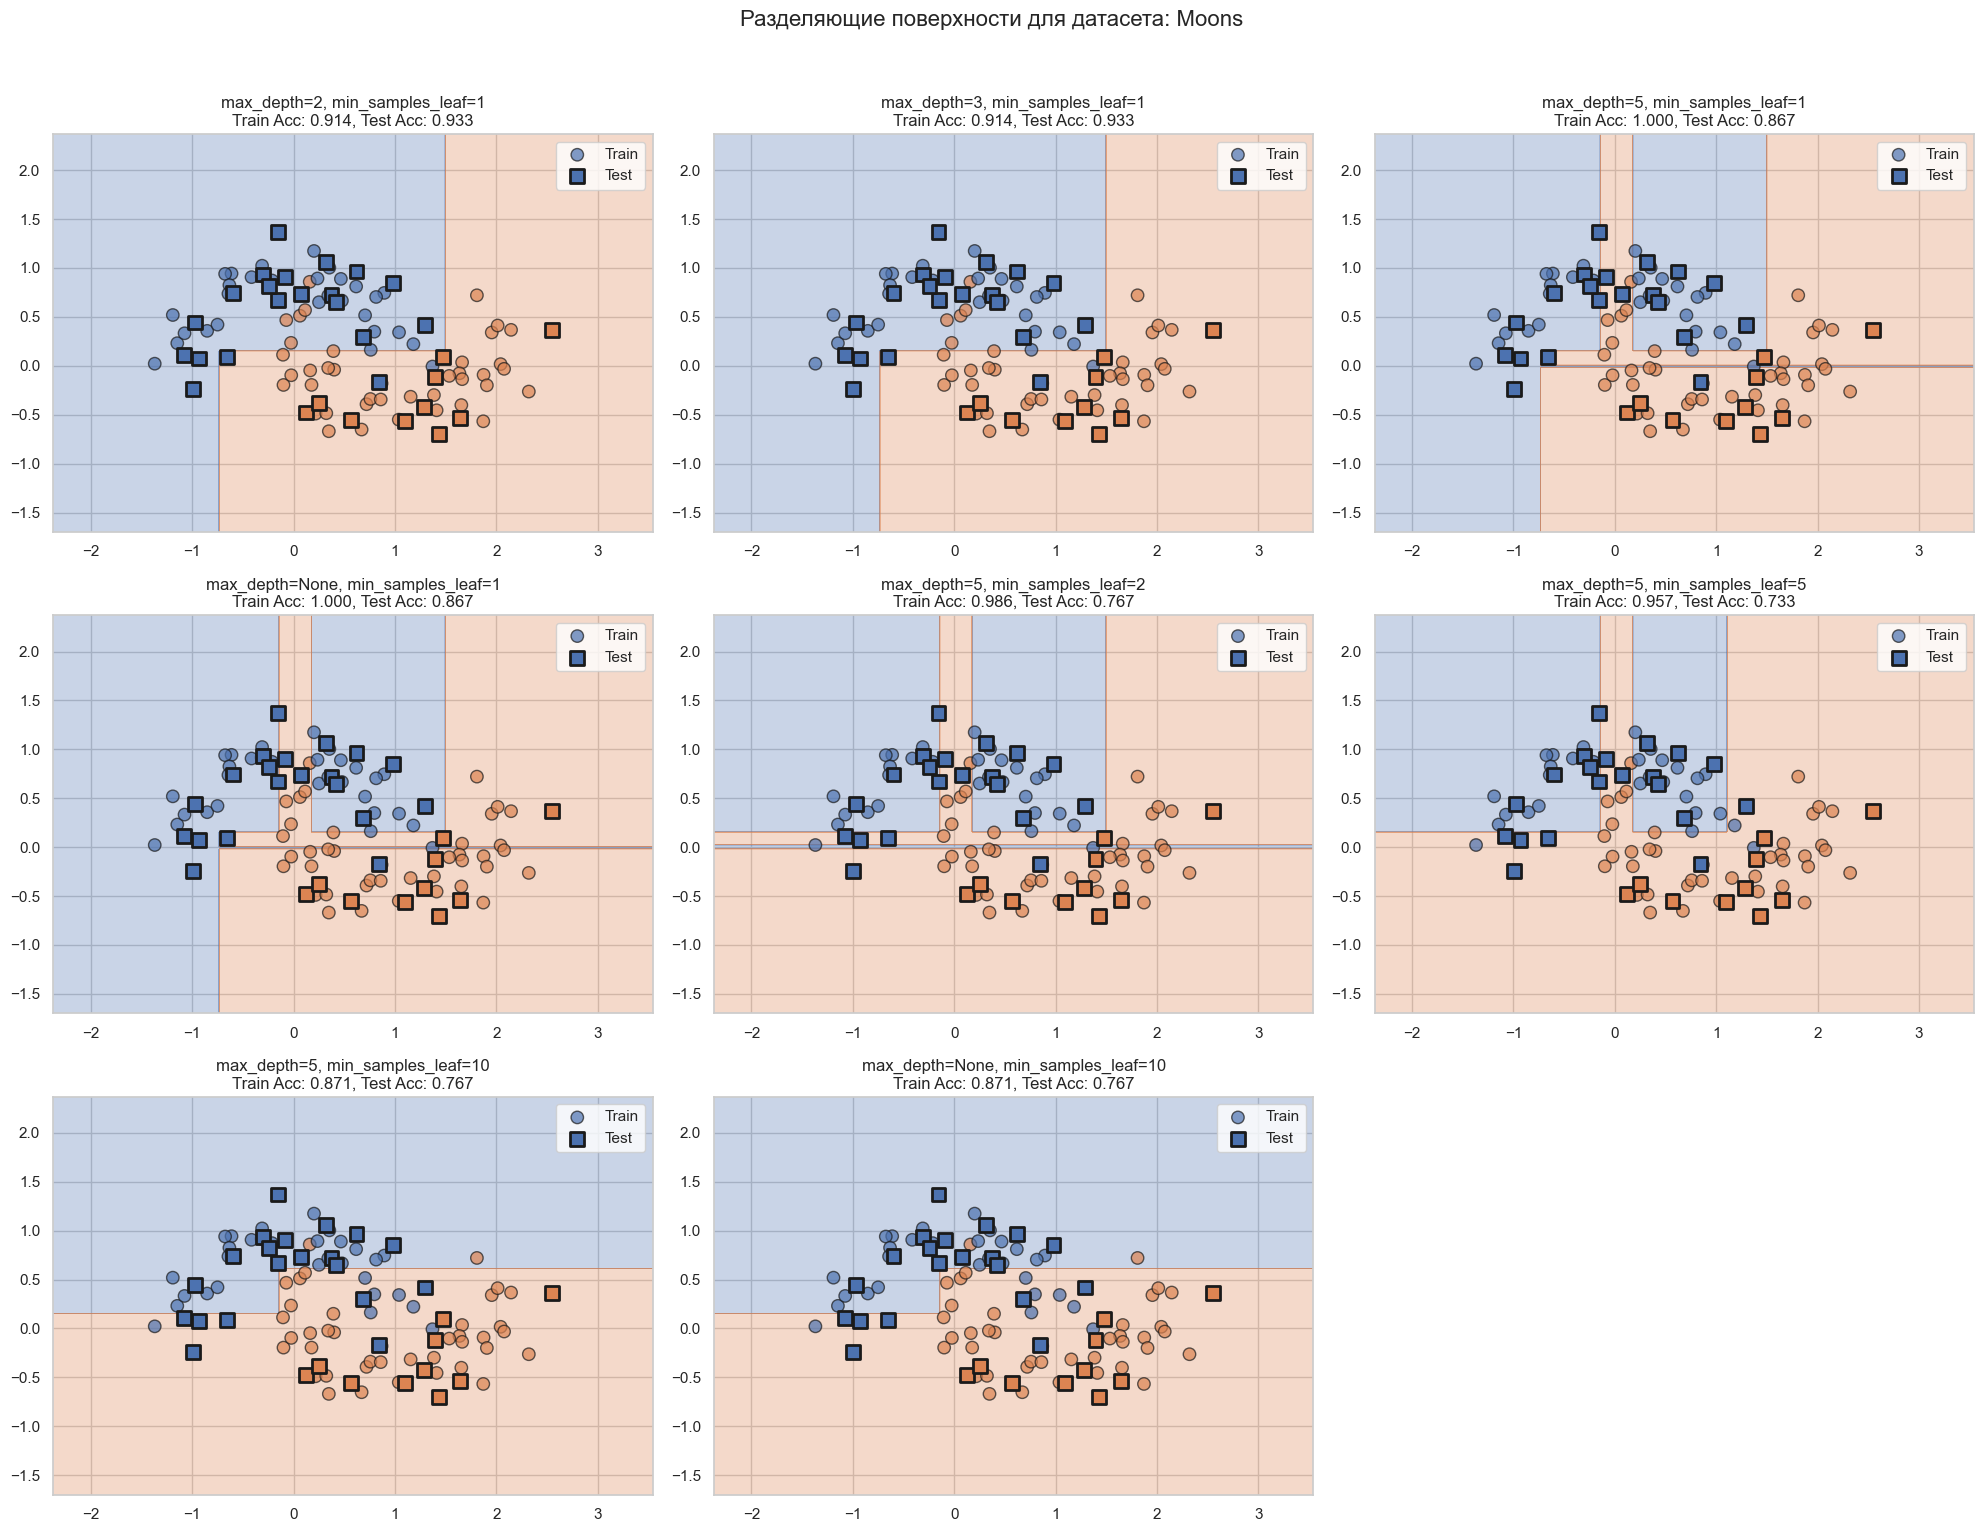


ДАТАСЕТ: Classification 3 classes
Параметры: max_depth=2, min_samples_leaf=1
  Глубина дерева: 2
  Число листьев: 4
  Обучающая accuracy: 0.900
  Тестовая accuracy: 0.767
  Разница (train - test): 0.133

Параметры: max_depth=3, min_samples_leaf=1
  Глубина дерева: 3
  Число листьев: 6
  Обучающая accuracy: 0.943
  Тестовая accuracy: 0.867
  Разница (train - test): 0.076

Параметры: max_depth=5, min_samples_leaf=1
  Глубина дерева: 5
  Число листьев: 10
  Обучающая accuracy: 0.971
  Тестовая accuracy: 0.800
  Разница (train - test): 0.171

Параметры: max_depth=None, min_samples_leaf=1
  Глубина дерева: 7
  Число листьев: 13
  Обучающая accuracy: 1.000
  Тестовая accuracy: 0.833
  Разница (train - test): 0.167

Параметры: max_depth=5, min_samples_leaf=2
  Глубина дерева: 5
  Число листьев: 10
  Обучающая accuracy: 0.914
  Тестовая accuracy: 0.833
  Разница (train - test): 0.081

Параметры: max_depth=5, min_samples_leaf=5
  Глубина дерева: 5
  Число листьев: 8
  Обучающая accuracy: 0.900

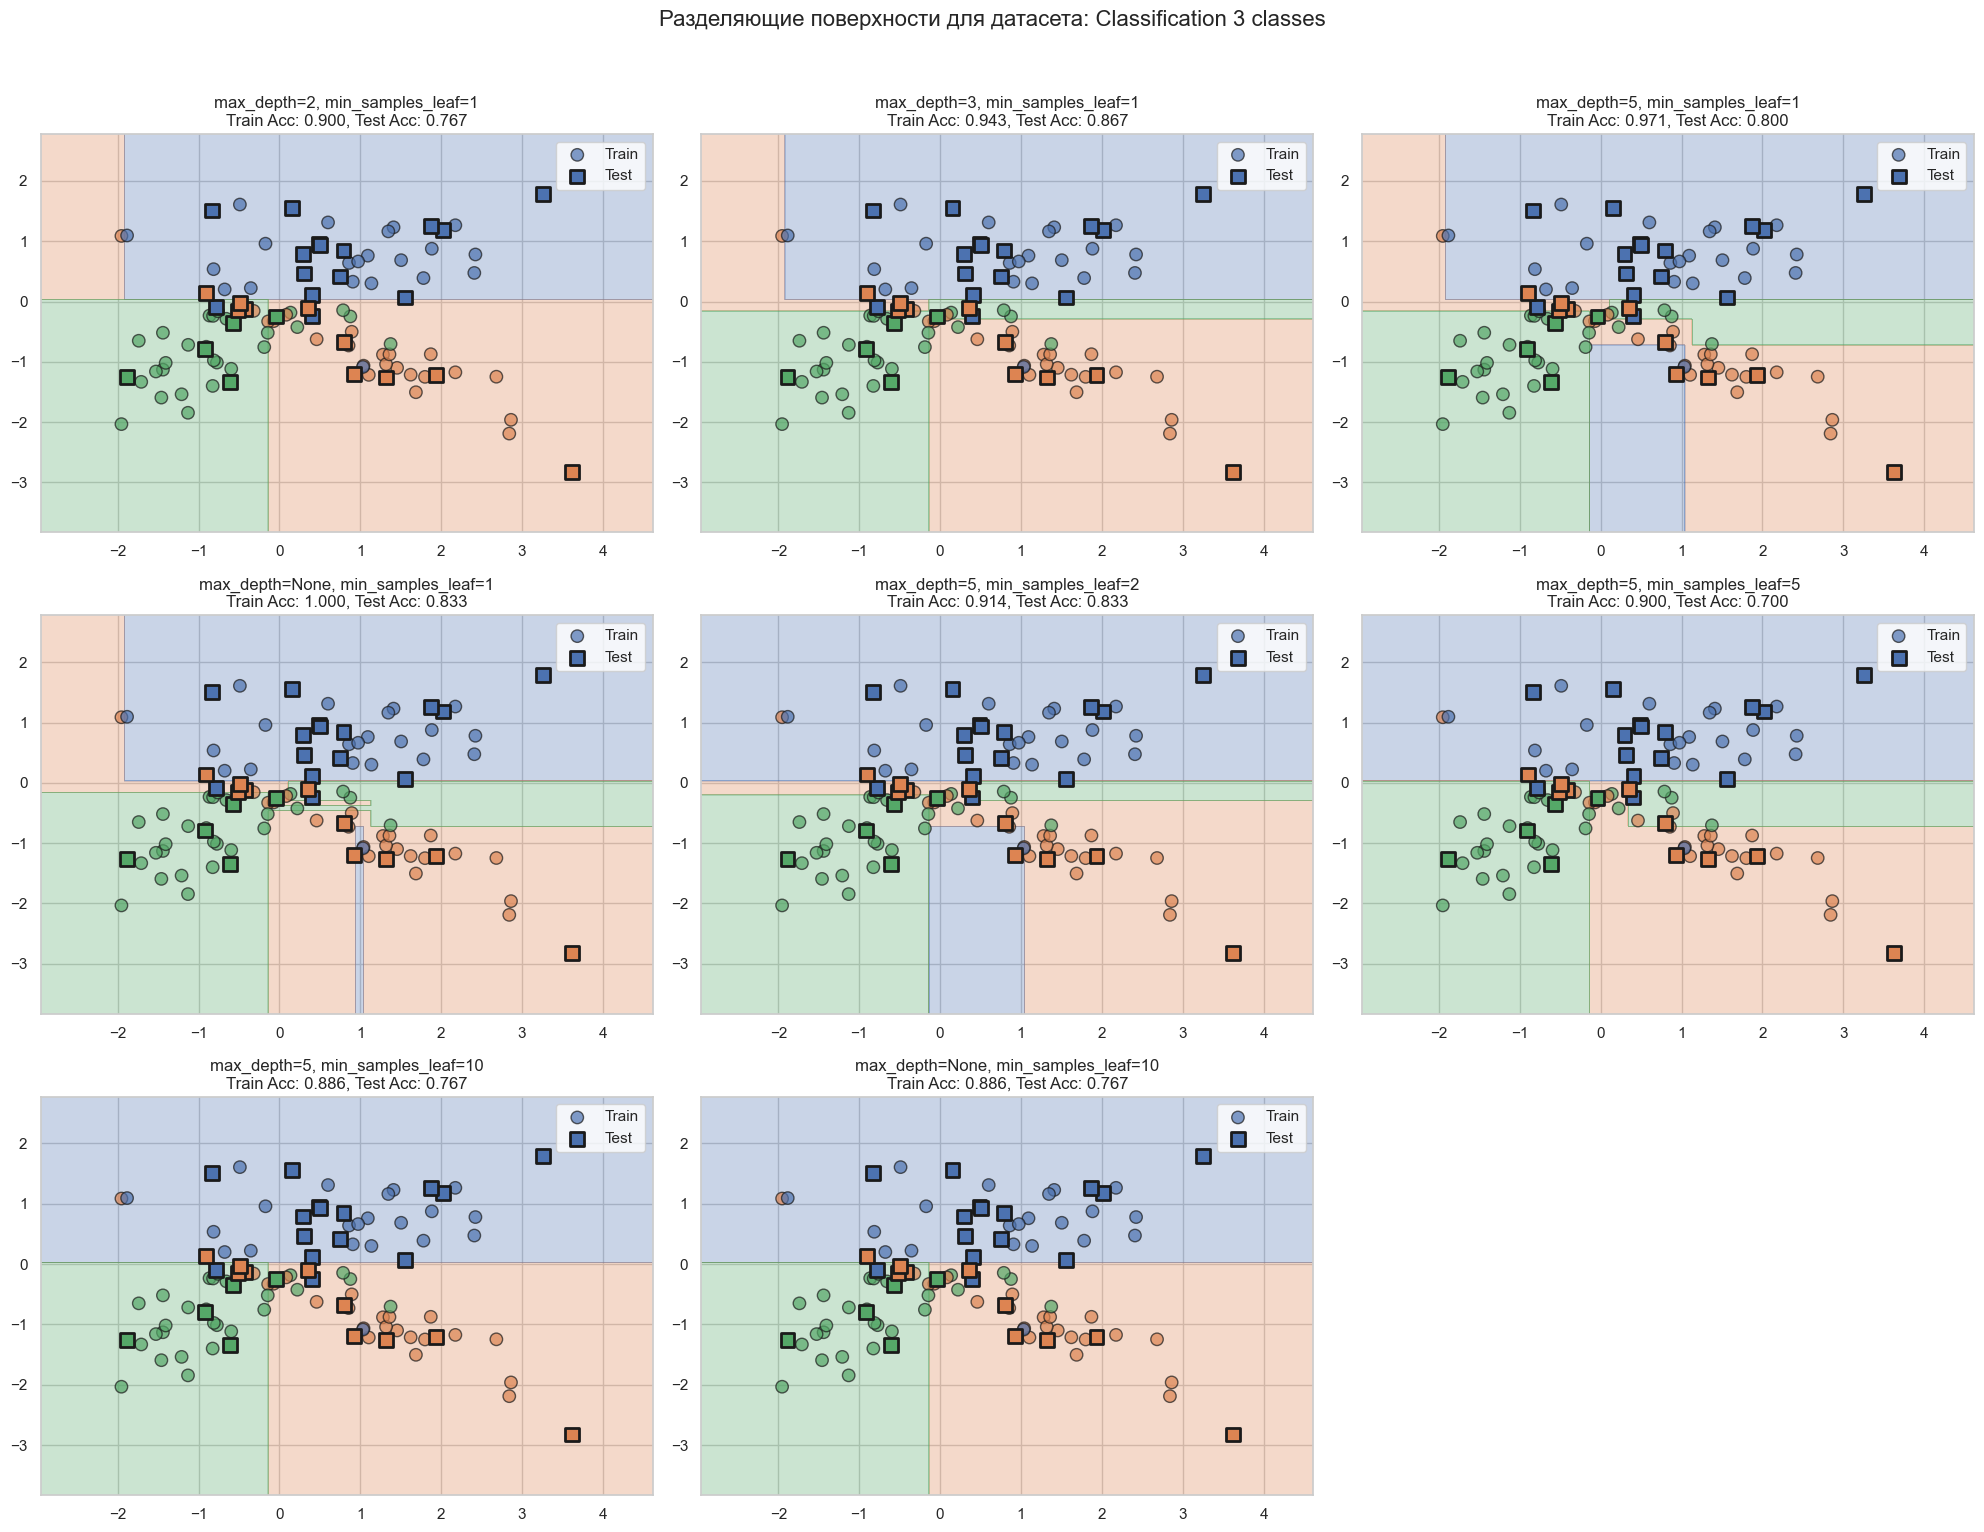

In [47]:
def plot_surface(clf, X_train, y_train, X_test, y_test, title):
    plot_step = 0.01
    # Определяем палитру на основе уникальных классов в обучающей выборке
    unique_classes = np.unique(y_train)
    palette = sns.color_palette(n_colors=len(unique_classes))
    cmap = ListedColormap(palette)
    
    # Определяем границы для построения поверхности
    x_min = min(X_train[:, 0].min(), X_test[:, 0].min()) - 1
    x_max = max(X_train[:, 0].max(), X_test[:, 0].max()) + 1
    y_min = min(X_train[:, 1].min(), X_test[:, 1].min()) - 1
    y_max = max(X_train[:, 1].max(), X_test[:, 1].max()) + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    
    # Предсказание для всех точек сетки
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Построение разделяющей поверхности
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
    
    # Отображение обучающих точек
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap, 
                alpha=0.7, edgecolors='k', linewidths=1, marker='o', s=80, label='Train')
    
    # Отображение тестовых точек
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap,
                alpha=1.0, edgecolors='k', linewidths=2, marker='s', s=100, label='Test')
    
    plt.title(title)
    plt.legend()

# Создание датасетов
datasets = [
    ("Circles", make_circles(noise=0.2, factor=0.5, random_state=42)),
    ("Moons", make_moons(noise=0.2, random_state=42)),
    ("Classification 3 classes", make_classification(n_classes=3, n_clusters_per_class=1, 
                                                      n_features=2, class_sep=.8, random_state=3,
                                                      n_redundant=0))
]

# Параметры для регуляризации
param_grid = [
    {'max_depth': 2, 'min_samples_leaf': 1},
    {'max_depth': 3, 'min_samples_leaf': 1},
    {'max_depth': 5, 'min_samples_leaf': 1},
    {'max_depth': None, 'min_samples_leaf': 1},  # Без ограничения глубины
    {'max_depth': 5, 'min_samples_leaf': 2},
    {'max_depth': 5, 'min_samples_leaf': 5},
    {'max_depth': 5, 'min_samples_leaf': 10},
    {'max_depth': None, 'min_samples_leaf': 10},
]

# Для каждого датасета
for dataset_name, (X, y) in datasets:
    print(f"\nДАТАСЕТ: {dataset_name}")
    
    # Разбиваем на обучающую и тестовую выборки с фиксированным random_state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Создаем фигуру для визуализации
    fig = plt.figure(figsize=(20, 15))
    fig.suptitle(f'Разделяющие поверхности для датасета: {dataset_name}', fontsize=16, y=1.02)
    
    # Для каждого набора гиперпараметров
    for i, params in enumerate(param_grid):
        # Создаем и обучаем классификатор
        clf = DecisionTreeClassifier(**params, random_state=42)
        clf.fit(X_train, y_train)
        
        # Предсказания и оценка точности
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        
        # Создаем подграфик
        ax = plt.subplot(3, 3, i+1)
        
        # Построение разделяющей поверхности
        plot_surface(clf, X_train, y_train, X_test, y_test, 
                    f"max_depth={params['max_depth']}, min_samples_leaf={params['min_samples_leaf']}\n"
                    f"Train Acc: {train_acc:.3f}, Test Acc: {test_acc:.3f}")
        
        # Вывод информации в консоль
        print(f"Параметры: max_depth={params['max_depth']}, min_samples_leaf={params['min_samples_leaf']}")
        print(f"  Глубина дерева: {clf.get_depth() if params['max_depth'] is None else params['max_depth']}")
        print(f"  Число листьев: {clf.get_n_leaves()}")
        print(f"  Обучающая accuracy: {train_acc:.3f}")
        print(f"  Тестовая accuracy: {test_acc:.3f}")
        print(f"  Разница (train - test): {train_acc - test_acc:.3f}")
        print()
    
    plt.tight_layout()
    plt.show()

__Ответ:__

# 2. Решающие деревья на 5 датасетах

__2.1. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

Информация о данных:
Размер: (8124, 23)
Классы: ['p' 'e']

Train размер: (5686, 22)
Test размер: (2438, 22)
Тестирование разных параметров max_depth:
Глубина: 2     | Train: 0.9107 | Test: 0.9114 | Листьев: 4
Глубина: 3     | Train: 0.9571 | Test: 0.9623 | Листьев: 8
Глубина: 4     | Train: 0.9757 | Test: 0.9828 | Листьев: 12
Глубина: 5     | Train: 0.9773 | Test: 0.9840 | Листьев: 15
Глубина: 7     | Train: 1.0000 | Test: 1.0000 | Листьев: 20
Глубина: 10    | Train: 1.0000 | Test: 1.0000 | Листьев: 20
Глубина: 15    | Train: 1.0000 | Test: 1.0000 | Листьев: 20
Глубина: 20    | Train: 1.0000 | Test: 1.0000 | Листьев: 20
Глубина: None  | Train: 1.0000 | Test: 1.0000 | Листьев: 20

Лучшая модель: глубина=7, test accuracy=1.0000

Итоговые результаты:
Точность на тесте: 1.0000
Глубина дерева: 7
Количество листьев: 20

Топ-5 важных признаков:
              Признак  Важность
8          gill-color  0.334466
19  spore-print-color  0.211654
20         population  0.182762
7           gill-size 

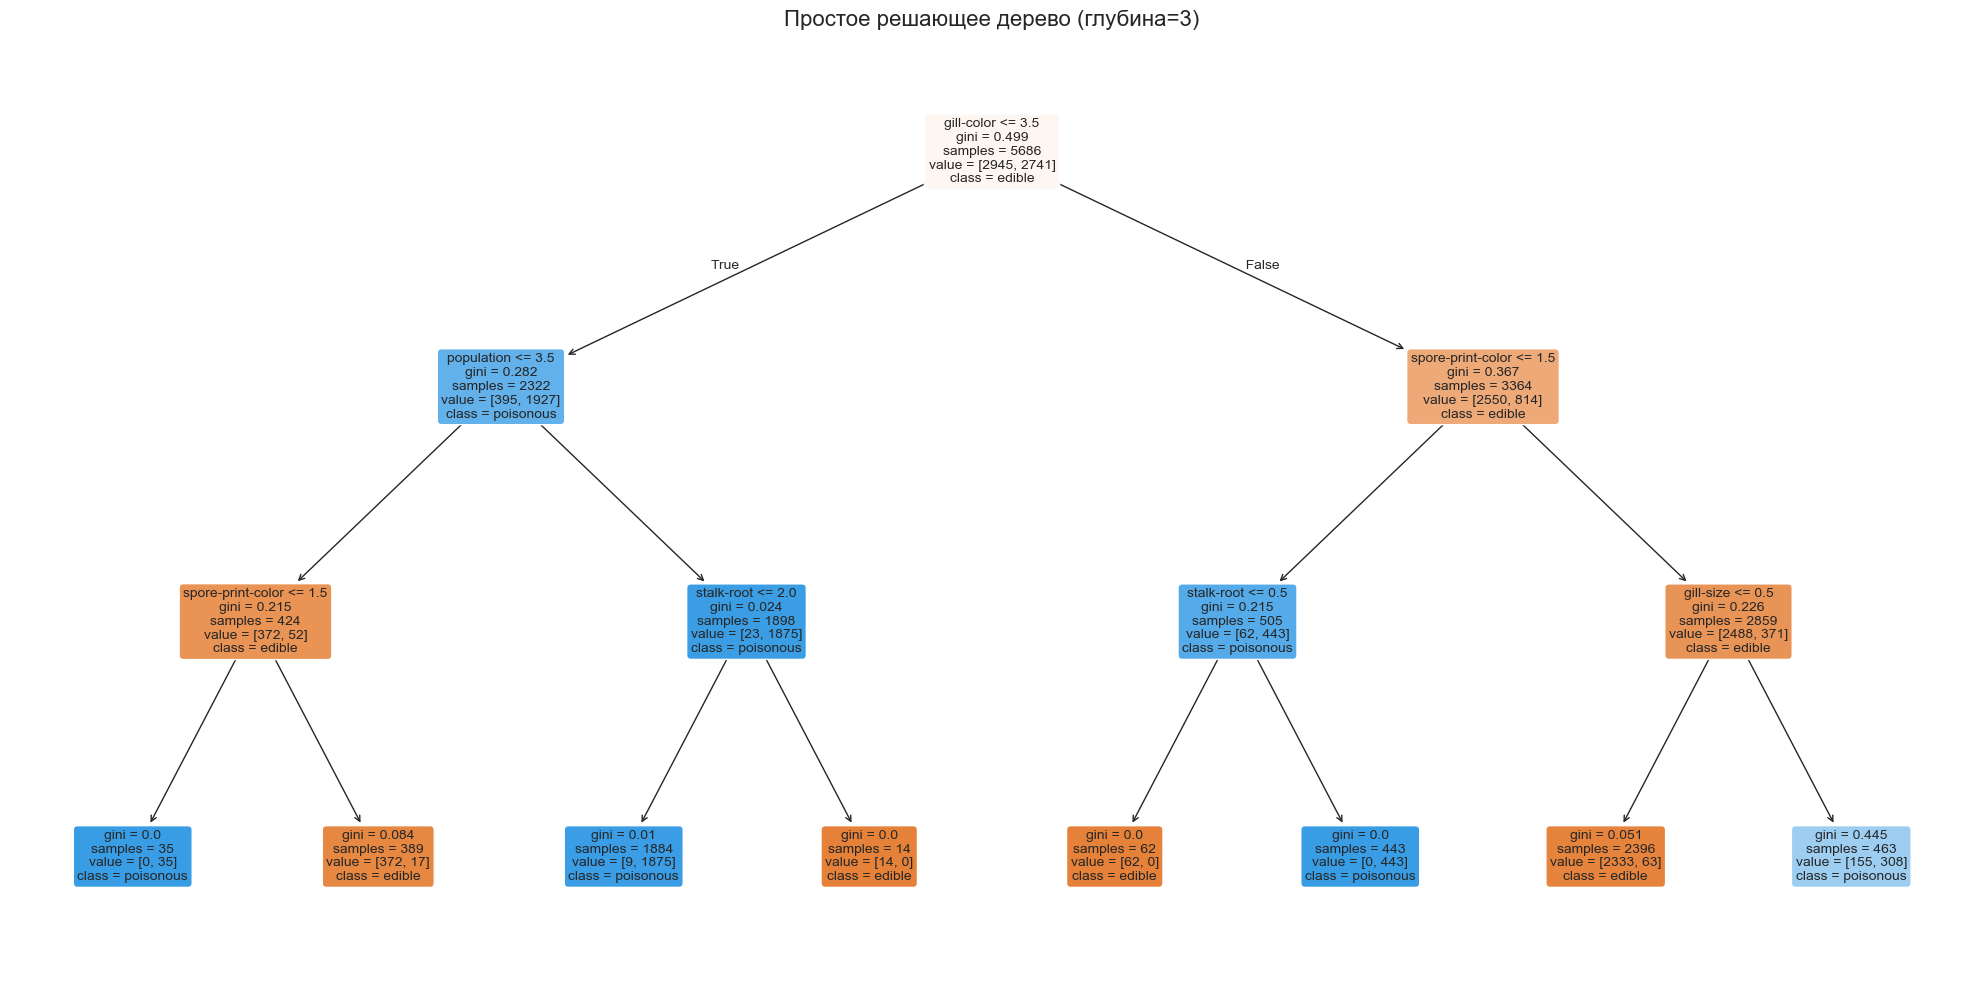

Сравнение с переобученной моделью (без ограничений):
Переобученная модель:
  Глубина: 7
  Листьев: 20
  Train accuracy: 1.0000
  Test accuracy: 1.0000

Итоговое сравнение:
Простая модель (глубина=3): Test accuracy = 0.9623
Оптимальная модель (глубина=7): Test accuracy = 1.0000
Переобученная модель: Test accuracy = 1.0000


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Загрузка данных
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
           'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
           'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
           'stalk-surface-below-ring', 'stalk-color-above-ring',
           'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
           'ring-type', 'spore-print-color', 'population', 'habitat']

df = pd.read_csv(url, header=None, names=columns)

print("Информация о данных:")
print(f"Размер: {df.shape}")
print(f"Классы: {df['class'].unique()}")

# Кодируем все категориальные признаки в числовые
df_encoded = df.copy()
for col in df_encoded.columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])

# Разделяем данные
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

# Разделение на train/test (70/30 вместо 50/50 для лучшей оценки)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nTrain размер: {X_train.shape}")
print(f"Test размер: {X_test.shape}")

# Тестируем разные глубины дерева
print("Тестирование разных параметров max_depth:")

results = []
for depth in [2, 3, 4, 5, 7, 10, 15, 20, None]:
    # Обучаем модель
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    
    # Считаем точность
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    
    results.append({
        'depth': depth,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'leaves': clf.get_n_leaves()
    })
    
    print(f"Глубина: {str(depth):5} | "
          f"Train: {train_acc:.4f} | "
          f"Test: {test_acc:.4f} | "
          f"Листьев: {clf.get_n_leaves()}")

# Находим лучшую модель по test accuracy
best_model = max(results, key=lambda x: x['test_acc'])
print(f"\nЛучшая модель: глубина={best_model['depth']}, "
      f"test accuracy={best_model['test_acc']:.4f}")

# Обучаем финальную модель с лучшей глубиной
final_clf = DecisionTreeClassifier(
    max_depth=best_model['depth'],
    random_state=42
)
final_clf.fit(X_train, y_train)

# Предсказания и оценка
y_pred = final_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nИтоговые результаты:")
print(f"Точность на тесте: {accuracy:.4f}")
print(f"Глубина дерева: {final_clf.get_depth()}")
print(f"Количество листьев: {final_clf.get_n_leaves()}")

# Важность признаков
importance = pd.DataFrame({
    'Признак': X.columns,
    'Важность': final_clf.feature_importances_
}).sort_values('Важность', ascending=False)

print(f"\nТоп-5 важных признаков:")
print(importance.head(5))

# Визуализация дерева (если не слишком большое)
if best_model['depth'] is not None and best_model['depth'] <= 5:
    plt.figure(figsize=(20, 10))
    plot_tree(
        final_clf,
        feature_names=X.columns,
        class_names=['edible', 'poisonous'],
        filled=True,
        rounded=True,
        fontsize=10
    )
    plt.title(f"Решающее дерево (глубина={best_model['depth']})", fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print("\nДерево слишком большое для визуализации.")

# Простая модель для визуализации
print("Простая модель (глубина=3) для наглядности:")

simple_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
simple_clf.fit(X_train, y_train)

simple_train_acc = accuracy_score(y_train, simple_clf.predict(X_train))
simple_test_acc = accuracy_score(y_test, simple_clf.predict(X_test))

print(f"Train accuracy: {simple_train_acc:.4f}")
print(f"Test accuracy: {simple_test_acc:.4f}")

# Визуализация простого дерева
plt.figure(figsize=(20, 10))
plot_tree(
    simple_clf,
    feature_names=X.columns,
    class_names=['edible', 'poisonous'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Простое решающее дерево (глубина=3)", fontsize=16)
plt.tight_layout()
plt.show()

# Сравнение с переобученной моделью
print("Сравнение с переобученной моделью (без ограничений):")

overfit_clf = DecisionTreeClassifier(max_depth=None, random_state=42)
overfit_clf.fit(X_train, y_train)

overfit_train_acc = accuracy_score(y_train, overfit_clf.predict(X_train))
overfit_test_acc = accuracy_score(y_test, overfit_clf.predict(X_test))

print(f"Переобученная модель:")
print(f"  Глубина: {overfit_clf.get_depth()}")
print(f"  Листьев: {overfit_clf.get_n_leaves()}")
print(f"  Train accuracy: {overfit_train_acc:.4f}")
print(f"  Test accuracy: {overfit_test_acc:.4f}")

print(f"\nИтоговое сравнение:")
print(f"Простая модель (глубина=3): Test accuracy = {simple_test_acc:.4f}")
print(f"Оптимальная модель (глубина={best_model['depth']}): Test accuracy = {best_model['test_acc']:.4f}")
print(f"Переобученная модель: Test accuracy = {overfit_test_acc:.4f}")


__2.2. (2 балла)__

Загрузите следующие наборы данных (все датасеты уже скачаны для удобства в папку datasets), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/dataset/101/tic+tac+toe+endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).
* [user-knowledge-modeling](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling) (классы не бинарные: High, Middle, Low, very_low)

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTreeClassifier, считающий все признаки вещественными
* DecisionTreeClassifier, считающий все признаки категориальными
* DecisionTreeClassifier, считающий все признаки вещественными + one-hot-encoding всех признаков  

Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder. 

СРАВНЕНИЕ МЕТОДОВ КОДИРОВАНИЯ

Датасет: mushrooms
  Размер: (8124, 22)
  Классы: 2
  Label Encoding: 0.9616 (+/- 0.0491)
  One-Hot Encoding: 0.9962 (+/- 0.0057)

Датасет: tic-tac-toe
  Размер: (958, 9)
  Классы: 2
  Label Encoding: 0.7028 (+/- 0.1187)
  One-Hot Encoding: 0.7944 (+/- 0.0306)

Датасет: cars
  Размер: (1728, 6)
  Классы: 4
  Label Encoding: 0.7935 (+/- 0.1082)
  One-Hot Encoding: 0.7367 (+/- 0.0523)

3. Итоговая таблица:
       dataset  label_encoding  onehot_encoding  original_features  onehot_features
0    mushrooms        0.961591         0.996183                 22              117
1  tic-tac-toe        0.702754         0.794383                  9               27
2         cars        0.793489         0.736738                  6               21

4. Визуализация результатов...


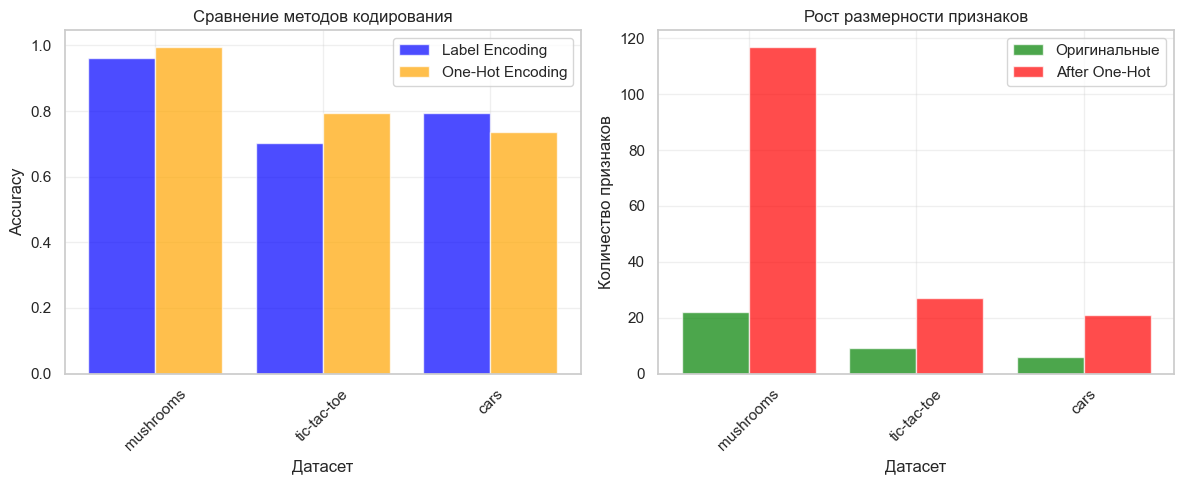


ПРОСТОЙ ПРИМЕР НА ДАТАСЕТЕ MUSHROOMS

Размер train: (5686, 22), test: (2438, 22)

Результаты на тестовой выборке:
  Label Encoding: 1.0000
  One-Hot Encoding: 1.0000


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score

# Загрузка датасетов
def load_simple_datasets():
    datasets = {}
    
    # 1. Mushrooms
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
    columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
               'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
               'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
               'stalk-surface-below-ring', 'stalk-color-above-ring',
               'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
               'ring-type', 'spore-print-color', 'population', 'habitat']
    
    df = pd.read_csv(url, header=None, names=columns)
    X = df.drop('class', axis=1)
    y = df['class']
    datasets['mushrooms'] = (X, y)
    
    # 2. Tic-tac-toe
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data"
    columns = ['top-left', 'top-middle', 'top-right',
               'middle-left', 'middle-middle', 'middle-right',
               'bottom-left', 'bottom-middle', 'bottom-right', 'class']
    
    df = pd.read_csv(url, header=None, names=columns)
    X = df.drop('class', axis=1)
    y = df['class']
    datasets['tic-tac-toe'] = (X, y)
    
    # 3. Cars
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
    columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
    
    df = pd.read_csv(url, header=None, names=columns)
    X = df.drop('class', axis=1)
    y = df['class']
    datasets['cars'] = (X, y)
    
    return datasets

# Кодирование данных
def encode_dataset(X, y, method='label'):
    """Кодируем датасет выбранным методом"""
    
    # Кодируем целевую переменную
    le_y = LabelEncoder()
    y_encoded = le_y.fit_transform(y)
    
    # Кодируем признаки
    if method == 'label':
        # Label Encoding
        X_encoded = X.copy()
        for col in X.columns:
            if X[col].dtype == 'object':
                le = LabelEncoder()
                X_encoded[col] = le.fit_transform(X[col].astype(str))
        return X_encoded.values, y_encoded
    
    elif method == 'onehot':
        # One-Hot Encoding
        X_str = X.astype(str)
        ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        X_encoded = ohe.fit_transform(X_str)
        return X_encoded, y_encoded
    
    return X.values, y_encoded

# Тестирование модели
def test_encoding(dataset_name, X, y):
    """Тестируем разные методы кодирования на одном датасете"""
    
    results = {'dataset': dataset_name}
    
    # Метод 1: Label Encoding
    X_label, y_label = encode_dataset(X, y, 'label')
    clf = DecisionTreeClassifier(random_state=42)
    scores = cross_val_score(clf, X_label, y_label, cv=5)
    results['label_encoding'] = scores.mean()
    results['label_std'] = scores.std()
    
    # Метод 2: One-Hot Encoding
    X_onehot, y_onehot = encode_dataset(X, y, 'onehot')
    clf = DecisionTreeClassifier(random_state=42, max_depth=10)
    scores = cross_val_score(clf, X_onehot, y_onehot, cv=5)
    results['onehot_encoding'] = scores.mean()
    results['onehot_std'] = scores.std()
    
    # Размерности
    results['original_features'] = X.shape[1]
    results['label_features'] = X_label.shape[1]
    results['onehot_features'] = X_onehot.shape[1]
    
    return results

# Основной код
print("СРАВНЕНИЕ МЕТОДОВ КОДИРОВАНИЯ")

# 1. Загружаем данные
datasets = load_simple_datasets()

# 2. Тестируем каждый датасет
all_results = []

for name, (X, y) in datasets.items():
    print(f"\nДатасет: {name}")
    print(f"  Размер: {X.shape}")
    print(f"  Классы: {y.nunique()}")
    
    results = test_encoding(name, X, y)
    all_results.append(results)
    
    print(f"  Label Encoding: {results['label_encoding']:.4f} (+/- {results['label_std']:.4f})")
    print(f"  One-Hot Encoding: {results['onehot_encoding']:.4f} (+/- {results['onehot_std']:.4f})")

# 3. Создаем таблицу результатов
print("\n3. Итоговая таблица:")
results_df = pd.DataFrame(all_results)
print(results_df[['dataset', 'label_encoding', 'onehot_encoding', 
                  'original_features', 'onehot_features']].to_string())

# 4. Визуализация
print("\n4. Визуализация результатов...")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# График 1: Сравнение accuracy
datasets_names = results_df['dataset']
x = np.arange(len(datasets_names))

ax1.bar(x - 0.2, results_df['label_encoding'], 0.4, 
        label='Label Encoding', color='blue', alpha=0.7)
ax1.bar(x + 0.2, results_df['onehot_encoding'], 0.4, 
        label='One-Hot Encoding', color='orange', alpha=0.7)

ax1.set_xlabel('Датасет')
ax1.set_ylabel('Accuracy')
ax1.set_title('Сравнение методов кодирования')
ax1.set_xticks(x)
ax1.set_xticklabels(datasets_names, rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)

# График 2: Количество признаков
ax2.bar(x - 0.2, results_df['original_features'], 0.4, 
        label='Оригинальные', color='green', alpha=0.7)
ax2.bar(x + 0.2, results_df['onehot_features'], 0.4, 
        label='After One-Hot', color='red', alpha=0.7)

ax2.set_xlabel('Датасет')
ax2.set_ylabel('Количество признаков')
ax2.set_title('Рост размерности признаков')
ax2.set_xticks(x)
ax2.set_xticklabels(datasets_names, rotation=45)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nПРОСТОЙ ПРИМЕР НА ДАТАСЕТЕ MUSHROOMS")

# Берем mushrooms для демонстрации
X, y = datasets['mushrooms']

# Разделяем на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nРазмер train: {X_train.shape}, test: {X_test.shape}")

# Тестируем Label Encoding
X_train_label, y_train_label = encode_dataset(X_train, y_train, 'label')
X_test_label, y_test_label = encode_dataset(X_test, y_test, 'label')

clf_label = DecisionTreeClassifier(random_state=42)
clf_label.fit(X_train_label, y_train_label)
label_acc = accuracy_score(y_test_label, clf_label.predict(X_test_label))

# Тестируем One-Hot Encoding
X_train_onehot, y_train_onehot = encode_dataset(X_train, y_train, 'onehot')
X_test_onehot, y_test_onehot = encode_dataset(X_test, y_test, 'onehot')

clf_onehot = DecisionTreeClassifier(random_state=42, max_depth=10)
clf_onehot.fit(X_train_onehot, y_train_onehot)
onehot_acc = accuracy_score(y_test_onehot, clf_onehot.predict(X_test_onehot))

print(f"\nРезультаты на тестовой выборке:")
print(f"  Label Encoding: {label_acc:.4f}")
print(f"  One-Hot Encoding: {onehot_acc:.4f}")

Выводы:
1. Label Encoding создает меньше признаков и работает быстрее
2. One-Hot Encoding создает много признаков, может приводить к переобучению
3. Для дерева решений часто лучше использовать Label Encoding
4. One-Hot лучше для линейных моделей, но хуже для деревьев

__2.3. (бонус, 1 балл)__

Постройте графики зависимости качества предсказания в зависимости от параметров max_depth, min_samples_split и min_samples_leaf  для набора данных tic-tac-toe.

Размер данных: (958, 10)
Train: (766, 9), Test: (192, 9)

1. Тестируем max_depth...
2. Тестируем min_samples_split...
3. Тестируем min_samples_leaf...

ЛУЧШИЕ ПАРАМЕТРЫ:
max_depth: 9 (точность: 0.9010)
min_samples_split: 3 (точность: 0.9062)
min_samples_leaf: 1 (точность: 0.9062)


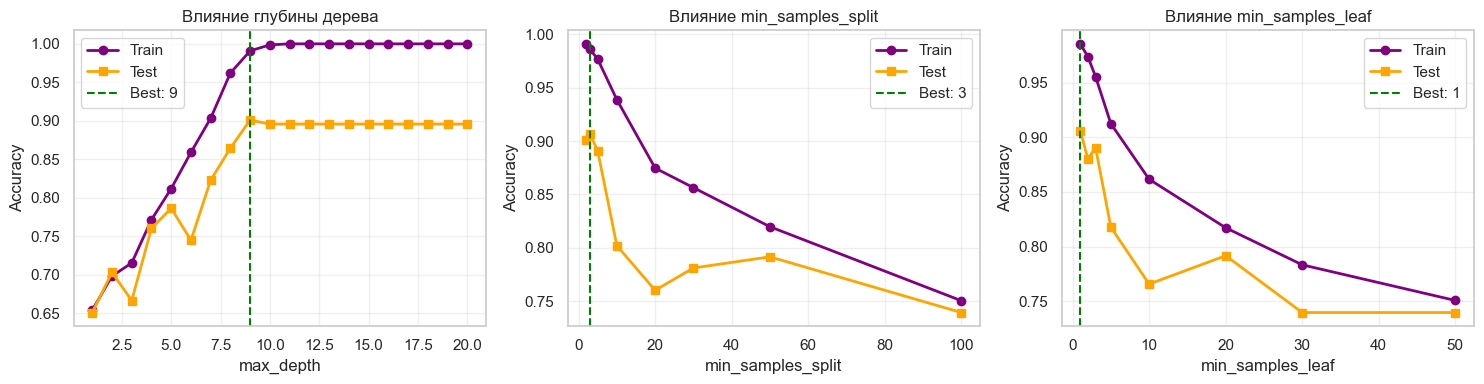


Обучение финальной модели...

Финальная модель:
  Точность на train: 0.9856
  Точность на test: 0.9062
  Глубина дерева: 9
  Количество листьев: 99

Модель по умолчанию (без регуляризации):
  Точность на train: 1.0000
  Точность на test: 0.8958
  Глубина дерева: 11
  Количество листьев: 110
ВЫВОДЫ:
1. max_depth ограничивает глубину дерева:
   - Маленькие значения: могут недообучаться
   - Большие значения: могут переобучаться

2. min_samples_split контролирует разделение узлов:
   - Большие значения: создают меньше узлов
   - Помогают бороться с переобучением

3. min_samples_leaf контролирует размер листьев:
   - Большие значения: делают дерево проще
   - Уменьшают чувствительность к выбросам


In [50]:
# Загрузка данных
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data"
columns = ['top-left', 'top-middle', 'top-right',
           'middle-left', 'middle-middle', 'middle-right',
           'bottom-left', 'bottom-middle', 'bottom-right', 'class']

df = pd.read_csv(url, header=None, names=columns)
print(f"Размер данных: {df.shape}")

# Подготовка данных
X = df.drop('class', axis=1)
y = df['class']

# Простое кодирование всех категориальных признаков
for col in X.columns:
    X[col] = LabelEncoder().fit_transform(X[col])
y = LabelEncoder().fit_transform(y)

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

# Функция для тестирования одного параметра
def test_parameter(param_name, param_values, default_params=None):
    """Тестируем разные значения одного параметра"""
    if default_params is None:
        default_params = {}
    
    train_scores = []
    test_scores = []
    
    for value in param_values:
        # Создаем модель с текущим значением параметра
        params = default_params.copy()
        params[param_name] = value
        
        clf = DecisionTreeClassifier(**params, random_state=42)
        clf.fit(X_train, y_train)
        
        # Считаем точность
        train_scores.append(accuracy_score(y_train, clf.predict(X_train)))
        test_scores.append(accuracy_score(y_test, clf.predict(X_test)))
    
    # Находим лучшее значение
    best_idx = np.argmax(test_scores)
    best_value = param_values[best_idx]
    best_score = test_scores[best_idx]
    
    return train_scores, test_scores, best_value, best_score

# 1. Тестируем max_depth
print("\n1. Тестируем max_depth...")
depths = list(range(1, 21))
train_depth, test_depth, best_depth, best_depth_score = test_parameter(
    'max_depth', depths, {'min_samples_split': 2, 'min_samples_leaf': 1}
)

# 2. Тестируем min_samples_split
print("2. Тестируем min_samples_split...")
splits = [2, 3, 5, 10, 20, 30, 50, 100]
train_split, test_split, best_split, best_split_score = test_parameter(
    'min_samples_split', splits, {'max_depth': best_depth, 'min_samples_leaf': 1}
)

# 3. Тестируем min_samples_leaf
print("3. Тестируем min_samples_leaf...")
leafs = [1, 2, 3, 5, 10, 20, 30, 50]
train_leaf, test_leaf, best_leaf, best_leaf_score = test_parameter(
    'min_samples_leaf', leafs, {'max_depth': best_depth, 'min_samples_split': best_split}
)

# Вывод результатов
print(f"\nЛУЧШИЕ ПАРАМЕТРЫ:")
print(f"max_depth: {best_depth} (точность: {best_depth_score:.4f})")
print(f"min_samples_split: {best_split} (точность: {best_split_score:.4f})")
print(f"min_samples_leaf: {best_leaf} (точность: {best_leaf_score:.4f})")

# Визуализация в одном графике
plt.figure(figsize=(15, 4))

# График 1: max_depth
plt.subplot(1, 3, 1)
plt.plot(depths, train_depth, 'purple', marker='o', label='Train', linewidth=2)
plt.plot(depths, test_depth, 'orange', marker='s', label='Test', linewidth=2)
plt.axvline(x=best_depth, color='green', linestyle='--', label=f'Best: {best_depth}')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Влияние глубины дерева')
plt.legend()
plt.grid(True, alpha=0.3)

# График 2: min_samples_split
plt.subplot(1, 3, 2)
plt.plot(splits, train_split, 'purple', marker='o', label='Train', linewidth=2)
plt.plot(splits, test_split, 'orange', marker='s', label='Test', linewidth=2)
plt.axvline(x=best_split, color='green', linestyle='--', label=f'Best: {best_split}')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.title('Влияние min_samples_split')
plt.legend()
plt.grid(True, alpha=0.3)

# График 3: min_samples_leaf
plt.subplot(1, 3, 3)
plt.plot(leafs, train_leaf, 'purple', marker='o', label='Train', linewidth=2)
plt.plot(leafs, test_leaf, 'orange', marker='s', label='Test', linewidth=2)
plt.axvline(x=best_leaf, color='green', linestyle='--', label=f'Best: {best_leaf}')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.title('Влияние min_samples_leaf')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Финальная модель с лучшими параметрами
print("\nОбучение финальной модели...")
final_clf = DecisionTreeClassifier(
    max_depth=best_depth,
    min_samples_split=best_split,
    min_samples_leaf=best_leaf,
    random_state=42
)
final_clf.fit(X_train, y_train)

# Оценка финальной модели
final_train_acc = accuracy_score(y_train, final_clf.predict(X_train))
final_test_acc = accuracy_score(y_test, final_clf.predict(X_test))

print(f"\nФинальная модель:")
print(f"  Точность на train: {final_train_acc:.4f}")
print(f"  Точность на test: {final_test_acc:.4f}")
print(f"  Глубина дерева: {final_clf.get_depth()}")
print(f"  Количество листьев: {final_clf.get_n_leaves()}")

# Сравнение с моделью по умолчанию
default_clf = DecisionTreeClassifier(random_state=42)
default_clf.fit(X_train, y_train)
default_train_acc = accuracy_score(y_train, default_clf.predict(X_train))
default_test_acc = accuracy_score(y_test, default_clf.predict(X_test))

print(f"\nМодель по умолчанию (без регуляризации):")
print(f"  Точность на train: {default_train_acc:.4f}")
print(f"  Точность на test: {default_test_acc:.4f}")
print(f"  Глубина дерева: {default_clf.get_depth()}")
print(f"  Количество листьев: {default_clf.get_n_leaves()}")

# Выводы
print("ВЫВОДЫ:")
print("1. max_depth ограничивает глубину дерева:")
print("   - Маленькие значения: могут недообучаться")
print("   - Большие значения: могут переобучаться")

print("\n2. min_samples_split контролирует разделение узлов:")
print("   - Большие значения: создают меньше узлов")
print("   - Помогают бороться с переобучением")

print("\n3. min_samples_leaf контролирует размер листьев:")
print("   - Большие значения: делают дерево проще")
print("   - Уменьшают чувствительность к выбросам")
    

__2.4. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

Загрузка датасетов...
Загружено 4 датасета
Тестируем методы кодирования...
Mushrooms...
  Label Encoding: 0.9616
  One-Hot Encoding: 0.9962
  Признаков: было 22, стало: Label=22, One-Hot=117

Tic-Tac-Toe...
  Label Encoding: 0.7028
  One-Hot Encoding: 0.7944
  Признаков: было 9, стало: Label=9, One-Hot=27

Cars...
  Label Encoding: 0.8947
  One-Hot Encoding: 0.6477
  Признаков: было 6, стало: Label=6, One-Hot=21

Nursery...
  Label Encoding: 0.9997
  One-Hot Encoding: 0.9998
  Признаков: было 8, стало: Label=8, One-Hot=27

ИТОГОВЫЕ РЕЗУЛЬТАТЫ:
             Label Encoding  One-Hot Encoding
Mushrooms            0.9616            0.9962
Tic-Tac-Toe          0.7028            0.7944
Cars                 0.8947            0.6477
Nursery              0.9997            0.9998



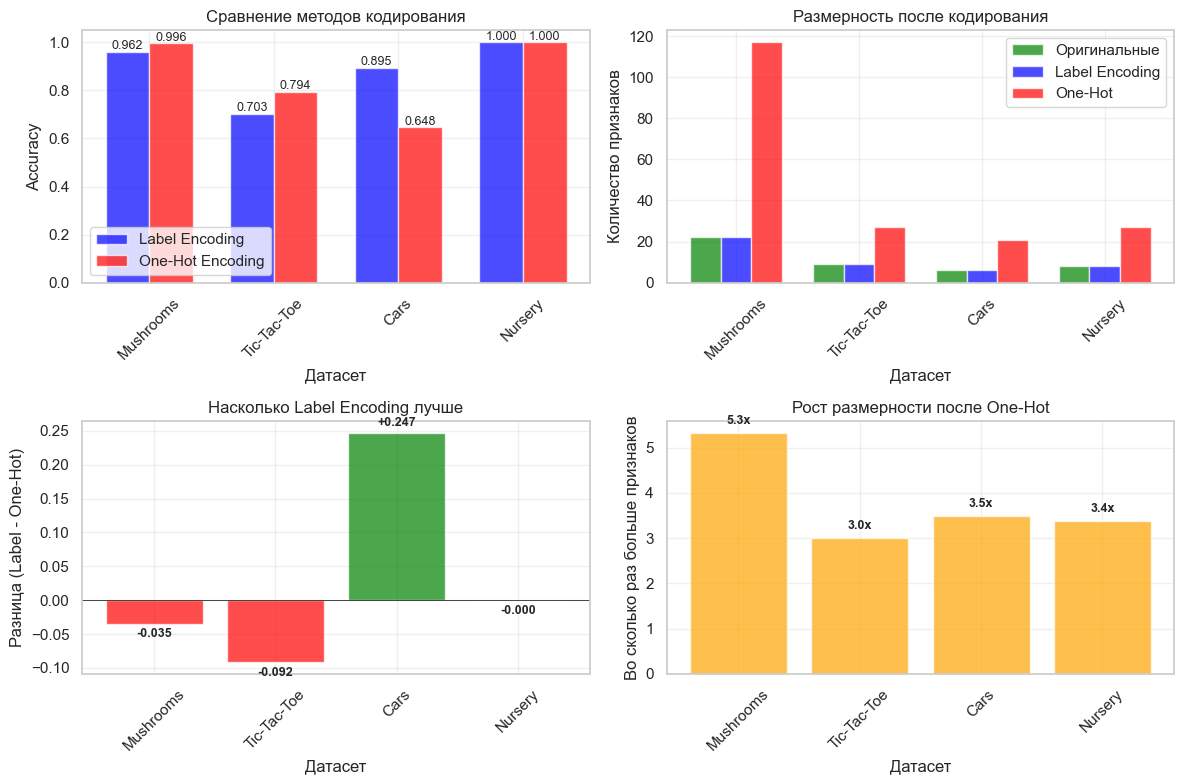

ВЫВОДЫ:
Mushrooms: One-Hot Encoding лучше на 0.0346
Tic-Tac-Toe: One-Hot Encoding лучше на 0.0916
Cars: Label Encoding лучше на 0.2470
Nursery: One-Hot Encoding лучше на 0.0002


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

print("Загрузка датасетов...")

# 1. Mushrooms (грибы)
url1 = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
cols1 = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
         'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
         'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
         'stalk-surface-below-ring', 'stalk-color-above-ring',
         'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
         'ring-type', 'spore-print-color', 'population', 'habitat']

df1 = pd.read_csv(url1, header=None, names=cols1)
X1 = df1.drop('class', axis=1)
y1 = df1['class']

# 2. Tic-tac-toe (крестики-нолики)
url2 = "https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data"
cols2 = ['top-left', 'top-middle', 'top-right',
         'middle-left', 'middle-middle', 'middle-right',
         'bottom-left', 'bottom-middle', 'bottom-right', 'class']

df2 = pd.read_csv(url2, header=None, names=cols2)
X2 = df2.drop('class', axis=1)
y2 = df2['class']

# 3. Cars (автомобили)
url3 = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
cols3 = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df3 = pd.read_csv(url3, header=None, names=cols3)
# Упрощаем задачу до бинарной классификации
df3['class'] = df3['class'].map({'unacc': 0, 'acc': 0, 'good': 1, 'vgood': 1})
X3 = df3.drop('class', axis=1)
y3 = df3['class']

# 4. Nursery (детский сад)
url4 = "https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data"
cols4 = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class']
df4 = pd.read_csv(url4, header=None, names=cols4)
# Упрощаем до бинарной классификации
df4['class'] = df4['class'].map({'not_recom': 0, 'recommend': 0, 'very_recom': 1, 'priority': 1, 'spec_prior': 1})
X4 = df4.drop('class', axis=1)
y4 = df4['class']

# Сохраняем датасеты
datasets = {
    'Mushrooms': (X1, y1),
    'Tic-Tac-Toe': (X2, y2),
    'Cars': (X3, y3),
    'Nursery': (X4, y4)
}

print(f"Загружено {len(datasets)} датасета")

# Функция для тестирования методов кодирования
def test_encoding_methods(X, y):
    """Тестируем 2 метода кодирования"""
    
    # Метод 1: Label Encoding
    X_label = X.copy()
    for col in X_label.columns:
        X_label[col] = LabelEncoder().fit_transform(X_label[col].astype(str))
    y_label = LabelEncoder().fit_transform(y)
    
    clf1 = DecisionTreeClassifier(random_state=42)
    scores1 = cross_val_score(clf1, X_label, y_label, cv=5)
    acc1 = scores1.mean()
    
    # Метод 2: One-Hot Encoding
    X_onehot = OneHotEncoder(sparse_output=False).fit_transform(X.astype(str))
    clf2 = DecisionTreeClassifier(random_state=42, max_depth=10)
    scores2 = cross_val_score(clf2, X_onehot, y_label, cv=5)
    acc2 = scores2.mean()
    
    return acc1, acc2, X_label.shape[1], X_onehot.shape[1]

# Тестируем все датасеты
print("Тестируем методы кодирования...")

results = {}
dimensions = {}

for name, (X, y) in datasets.items():
    print(f"{name}...")
    label_acc, onehot_acc, label_dim, onehot_dim = test_encoding_methods(X, y)
    
    results[name] = {
        'Label Encoding': label_acc,
        'One-Hot Encoding': onehot_acc
    }
    
    dimensions[name] = {
        'Оригинальные признаки': X.shape[1],
        'После Label Encoding': label_dim,
        'После One-Hot': onehot_dim
    }
    
    print(f"  Label Encoding: {label_acc:.4f}")
    print(f"  One-Hot Encoding: {onehot_acc:.4f}")
    print(f"  Признаков: было {X.shape[1]}, стало: Label={label_dim}, One-Hot={onehot_dim}")
    print()

# Создаем таблицу результатов
df_results = pd.DataFrame(results).T
print("ИТОГОВЫЕ РЕЗУЛЬТАТЫ:")
print(df_results.round(4))
print()

# Визуализация
plt.figure(figsize=(12, 8))

# График 1: Сравнение точности
plt.subplot(2, 2, 1)
datasets_names = list(results.keys())
x = np.arange(len(datasets_names))
width = 0.35

plt.bar(x - width/2, [results[name]['Label Encoding'] for name in datasets_names], 
        width, label='Label Encoding', color='blue', alpha=0.7)
plt.bar(x + width/2, [results[name]['One-Hot Encoding'] for name in datasets_names], 
        width, label='One-Hot Encoding', color='red', alpha=0.7)

plt.xlabel('Датасет')
plt.ylabel('Accuracy')
plt.title('Сравнение методов кодирования')
plt.xticks(x, datasets_names, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# Добавляем значения на столбцы
for i, name in enumerate(datasets_names):
    plt.text(i - width/2, results[name]['Label Encoding'] + 0.01, 
             f"{results[name]['Label Encoding']:.3f}", ha='center', fontsize=9)
    plt.text(i + width/2, results[name]['One-Hot Encoding'] + 0.01, 
             f"{results[name]['One-Hot Encoding']:.3f}", ha='center', fontsize=9)

# График 2: Размерность признаков
plt.subplot(2, 2, 2)
dim_df = pd.DataFrame(dimensions).T
x = np.arange(len(datasets_names))
width = 0.25

plt.bar(x - width, dim_df['Оригинальные признаки'], width, label='Оригинальные', color='green', alpha=0.7)
plt.bar(x, dim_df['После Label Encoding'], width, label='Label Encoding', color='blue', alpha=0.7)
plt.bar(x + width, dim_df['После One-Hot'], width, label='One-Hot', color='red', alpha=0.7)

plt.xlabel('Датасет')
plt.ylabel('Количество признаков')
plt.title('Размерность после кодирования')
plt.xticks(x, datasets_names, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# График 3: Разница в точности
plt.subplot(2, 2, 3)
differences = []
for name in datasets_names:
    diff = results[name]['Label Encoding'] - results[name]['One-Hot Encoding']
    differences.append(diff)

colors = ['green' if diff > 0 else 'red' for diff in differences]
plt.bar(datasets_names, differences, color=colors, alpha=0.7)
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.xlabel('Датасет')
plt.ylabel('Разница (Label - One-Hot)')
plt.title('Насколько Label Encoding лучше')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Добавляем подписи
for i, (name, diff) in enumerate(zip(datasets_names, differences)):
    label = f'+{diff:.3f}' if diff > 0 else f'{diff:.3f}'
    plt.text(i, diff + (0.01 if diff > 0 else -0.02), label, 
             ha='center', fontsize=9, fontweight='bold')

# График 4: Увеличение размерности
plt.subplot(2, 2, 4)
increase_ratio = []
for name in datasets_names:
    ratio = dimensions[name]['После One-Hot'] / dimensions[name]['Оригинальные признаки']
    increase_ratio.append(ratio)

plt.bar(datasets_names, increase_ratio, color='orange', alpha=0.7)
plt.xlabel('Датасет')
plt.ylabel('Во сколько раз больше признаков')
plt.title('Рост размерности после One-Hot')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Добавляем подписи
for i, (name, ratio) in enumerate(zip(datasets_names, increase_ratio)):
    plt.text(i, ratio + 0.2, f'{ratio:.1f}x', ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("ВЫВОДЫ:")

for name in datasets_names:
    label_acc = results[name]['Label Encoding']
    onehot_acc = results[name]['One-Hot Encoding']
    
    if label_acc > onehot_acc:
        diff = label_acc - onehot_acc
        print(f"{name}: Label Encoding лучше на {diff:.4f}")
    elif onehot_acc > label_acc:
        diff = onehot_acc - label_acc
        print(f"{name}: One-Hot Encoding лучше на {diff:.4f}")
    else:
        print(f"{name}: Оба метода одинаковы")

## 3. Практическое задание. Градиентный бустинг ~~своими руками~~

Поздравляю! Это финальное упражнение в нашем курсе. Проявите все своё старание, терпение и опыт, чтобы выполнить его.  
Теперь вы многое знаете из машинного обучения и для вас не составит сложности попробовать разные алгоритмы, новые библиотеки и применить их к реальной задаче.

__3.1. (0.5 балла)__

Мы будем использовать данные соревнования [Home Credit Default Risk](https://www.kaggle.com/c/home-credit-default-risk/data). (Данные уже загружены в папку `datasets/HomeCredit`) 

* Загрузите таблицу **application_train.csv**;
* Запишите в Y столбец с целевой переменной;
* Удалите ненужные столбцы (для этого воспользуйтесь описанием);
* Определите тип столбцов и заполните пропуски - стратегия произвольная;
* Разбейте выборку в соотношении 70:30 с random_state=0.

Так как в данных значительный дисбаланс классов, в качестве метрики качества везде будем использовать площадь под precision-recall кривой.

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# 1. Загрузка данных
print("Загрузка данных...")
file_path = 'datasets/HomeCredit/application_train.csv'

data = pd.read_csv(file_path)
print(f"Данные успешно загружены. Размер: {data.shape}")

# 2. Выделяем целевую переменную
print("\n2. Подготовка целевой переменной...")
Y = data['TARGET']
print(f"Распределение классов в целевой переменной:")
print(Y.value_counts())
print(f"\nДисбаланс: {Y.value_counts()[0] / len(Y):.2%} vs {Y.value_counts()[1] / len(Y):.2%}")

# 3. Удаляем ненужные столбцы
print("\n3. Удаление ненужных столбцов...")

# Столбцы, которые точно не нужны (на основе описания данных)
columns_to_remove = [
    'SK_ID_CURR',  # ID клиента - не информативный признак
]

# Проверяем, какие из этих столбцов есть в данных
existing_columns = [col for col in columns_to_remove if col in data.columns]
data = data.drop(columns=existing_columns)
print(f"Удалено столбцов: {len(existing_columns)}")

# 4. Анализ пропущенных значений
print("\n4. Анализ пропущенных значений...")

# Считаем количество пропущенных значений в каждом столбце
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

print(f"Столбцов всего: {len(data.columns)}")
print(f"Столбцов с пропусками: {(missing_values > 0).sum()}")

# Определяем стратегию для удаления/заполнения пропусков
# Удаляем столбцы с большим количеством пропусков (>40%)
high_missing_cols = missing_percentage[missing_percentage > 40].index.tolist()
print(f"\nУдаляем столбцы с >40% пропусков: {len(high_missing_cols)} столбцов")
data = data.drop(columns=high_missing_cols)

# 5. Разделяем на числовые и категориальные признаки
print("\n5. Разделение признаков по типам...")

# Выбираем только числовые признаки (исключая целевую переменную)
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Убираем целевую переменную из числовых признаков
if 'TARGET' in numerical_cols:
    numerical_cols.remove('TARGET')

# Категориальные признаки
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

print(f"Числовых признаков: {len(numerical_cols)}")
print(f"Категориальных признаков: {len(categorical_cols)}")

# 6. Заполнение пропусков
print("\n6. Заполнение пропущенных значений...")

# Для числовых признаков - медианой
for col in numerical_cols:
    if data[col].isnull().any():
        median_value = data[col].median()
        data[col].fillna(median_value, inplace=True)

# Для категориальных признаков - модой (самым частым значением)
for col in categorical_cols:
    if data[col].isnull().any():
        mode_value = data[col].mode()[0]
        data[col].fillna(mode_value, inplace=True)

print(f"После заполнения пропусков:")
print(f"Оставшиеся пропуски: {data.isnull().sum().sum()}")

# 7. Кодирование категориальных признаков
print("\n7. Кодирование категориальных признаков...")

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

print(f"Категориальные признаки закодированы.")

# 8. Подготовка X и Y
print("\n8. Подготовка финального датасета...")
X = data.drop('TARGET', axis=1)
Y = data['TARGET']

print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")

# 9. Разделение на train/test
print("\n9. Разделение на обучающую и тестовую выборки...")
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=0, stratify=Y
)

print(f"Размеры выборок:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

# Проверяем распределение классов в выборках
print(f"\nРаспределение классов в y_train: {np.bincount(y_train)}")
print(f"Распределение классов в y_test: {np.bincount(y_test)}")

# 10. Сохранение результатов
print("\n10. Сохранение подготовленных данных...")
try:
    # Создаем DataFrame для удобства
    train_df = pd.concat([pd.DataFrame(X_train), pd.Series(y_train, name='TARGET')], axis=1)
    test_df = pd.concat([pd.DataFrame(X_test), pd.Series(y_test, name='TARGET')], axis=1)
    
    # Сохраняем в CSV
    train_df.to_csv('home_credit_train_prepared.csv', index=False)
    test_df.to_csv('home_credit_test_prepared.csv', index=False)
    
    print("Данные сохранены в файлы:")
    print("  - home_credit_train_prepared.csv")
    print("  - home_credit_test_prepared.csv")
except Exception as e:
    print(f"Ошибка при сохранении: {e}")

# 11. Проверка качества данных
print("\n" + "="*60)
print("ИНФОРМАЦИЯ О ПОДГОТОВЛЕННЫХ ДАННЫХ")
print("="*60)

print(f"Количество признаков: {X_train.shape[1]}")
print(f"Типы признаков:")
print(f"  - Числовые: {len(numerical_cols)}")
print(f"  - Категориальные (после кодирования): {len(categorical_cols)}")

# Проверяем наличие выбросов в числовых признаках
print(f"\nСтатистика по числовым признакам:")
print(f"Среднее значение признаков: {X_train[numerical_cols].mean().mean():.2f}")
print(f"Стандартное отклонение: {X_train[numerical_cols].std().mean():.2f}")

# Информация о дисбалансе
print(f"\nИнформация о дисбалансе:")
print(f"Класс 0 (нет проблем): {np.sum(y_train == 0)} ({np.sum(y_train == 0)/len(y_train):.2%})")
print(f"Класс 1 (проблемы): {np.sum(y_train == 1)} ({np.sum(y_train == 1)/len(y_train):.2%})")

print("\nДанные готовы для обучения модели!")
print("Метрика оценки: PR-AUC (площадь под precision-recall кривой)")
    

Загрузка данных...
Данные успешно загружены. Размер: (307511, 122)

2. Подготовка целевой переменной...
Распределение классов в целевой переменной:
TARGET
0    282686
1     24825
Name: count, dtype: int64

Дисбаланс: 91.93% vs 8.07%

3. Удаление ненужных столбцов...
Удалено столбцов: 1

4. Анализ пропущенных значений...
Столбцов всего: 121
Столбцов с пропусками: 67

Удаляем столбцы с >40% пропусков: 49 столбцов

5. Разделение признаков по типам...
Числовых признаков: 59
Категориальных признаков: 12

6. Заполнение пропущенных значений...
После заполнения пропусков:
Оставшиеся пропуски: 0

7. Кодирование категориальных признаков...
Категориальные признаки закодированы.

8. Подготовка финального датасета...
X shape: (307511, 71)
Y shape: (307511,)

9. Разделение на обучающую и тестовую выборки...
Размеры выборок:
X_train: (215257, 71)
X_test: (92254, 71)
y_train: (215257,)
y_test: (92254,)

Распределение классов в y_train: [197880  17377]
Распределение классов в y_test: [84806  7448]

10.

__3.2. (1.5 балла)__

Также мы будем использовать две реализации градиентного бустинга: [LightGBM](https://lightgbm.readthedocs.io/en/stable/Python-API.html) и [Catboost](https://catboost.ai/en/docs/), которые вам необходимо самостоятельно изучить и установить, используя команды:  
`!pip install lightgb`  
`!pip install catboost`  
Обучите реализации градиентного бустинга LightGBM и Catboost на вещественных признаках без подбора параметров. 
Почему получилась заметная разница в качестве? 

В этом и последующих экспериментах необходимо измерять время обучения моделей.

In [53]:
import sys
!{sys.executable} -m pip install lightgbm catboost

Загрузка данных...
Исходный размер: (307511, 122)
Числовых признаков: 104
Дисбаланс классов: 8.07% положительных

Размеры выборок:
Train: (215257, 104)
Test: (92254, 104)
LightGBM
Обучение...
Время обучения: 2.80 сек
PR-AUC: 0.2343
CatBoost
Обучение...
Время обучения: 4.43 сек
PR-AUC: 0.2204
Сравнение моделей
  Модель   PR-AUC  Время (сек)
LightGBM 0.234266     2.803500
CatBoost 0.220440     4.425229


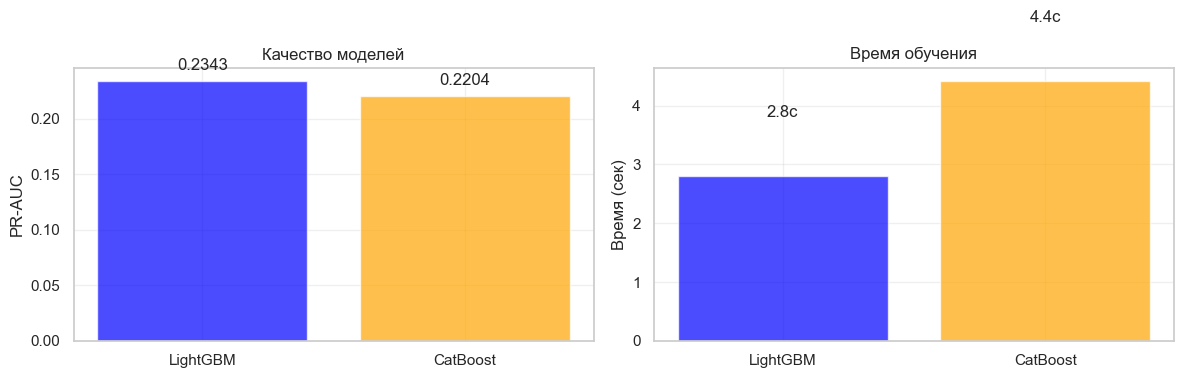

Выводы:
LightGBM лучше на 0.0138
LightGBM быстрее в 1.6 раз


In [54]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score

# Загрузка данных
print("Загрузка данных...")
df = pd.read_csv('/Users/marya/Рабочий стол/Обучение/Универ/ML/homework-practice-07_final/datasets/HomeCredit/application_train.csv')

# Подготовка данных
print(f"Исходный размер: {df.shape}")

# Целевая переменная
y = df['TARGET']

# Удаляем ненужные столбцы
drop_cols = ['SK_ID_CURR', 'TARGET']
X = df.drop(columns=drop_cols)

# Оставляем только числовые признаки (вещественные)
numeric_cols = X.select_dtypes(include=[np.number]).columns
X = X[numeric_cols]

# Заполняем пропуски средним значением
for col in X.columns:
    X[col] = X[col].fillna(X[col].median())

print(f"Числовых признаков: {X.shape[1]}")
print(f"Дисбаланс классов: {y.mean():.2%} положительных")

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

print(f"\nРазмеры выборок:")
print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")

# ========== LightGBM ==========
print("LightGBM")

try:
    import lightgbm as lgb
    
    start_time = time.time()
    
    # Простая модель LightGBM
    lgb_model = lgb.LGBMClassifier(
        n_estimators=100,
        random_state=0,
        verbose=-1  # Без вывода логов
    )
    
    print("Обучение...")
    lgb_model.fit(X_train, y_train)
    
    lgb_time = time.time() - start_time
    print(f"Время обучения: {lgb_time:.2f} сек")
    
    # Предсказания и оценка
    y_pred_lgb = lgb_model.predict_proba(X_test)[:, 1]
    lgb_score = average_precision_score(y_test, y_pred_lgb)
    print(f"PR-AUC: {lgb_score:.4f}")
    
except ImportError:
    print("LightGBM не установлен!")
    lgb_score = None
    lgb_time = None

# ========== CatBoost ==========
print("CatBoost")

try:
    from catboost import CatBoostClassifier
    
    start_time = time.time()
    
    # Простая модель CatBoost
    cb_model = CatBoostClassifier(
        n_estimators=100,
        random_state=0,
        verbose=False  # Без вывода логов
    )
    
    print("Обучение...")
    cb_model.fit(X_train, y_train)
    
    cb_time = time.time() - start_time
    print(f"Время обучения: {cb_time:.2f} сек")
    
    # Предсказания и оценка
    y_pred_cb = cb_model.predict_proba(X_test)[:, 1]
    cb_score = average_precision_score(y_test, y_pred_cb)
    print(f"PR-AUC: {cb_score:.4f}")
    
except ImportError:
    print("CatBoost не установлен!")
    cb_score = None
    cb_time = None

# Сравнение
print("Сравнение моделей")

# Создаем таблицу сравнения
results = pd.DataFrame({
    'Модель': ['LightGBM', 'CatBoost'],
    'PR-AUC': [lgb_score, cb_score],
    'Время (сек)': [lgb_time, cb_time]
})

print(results.to_string(index=False))

# График сравнения
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# График 1: Сравнение PR-AUC
ax1.bar(['LightGBM', 'CatBoost'], [lgb_score or 0, cb_score or 0], 
        color=['blue', 'orange'], alpha=0.7)
ax1.set_ylabel('PR-AUC')
ax1.set_title('Качество моделей')
ax1.grid(True, alpha=0.3)

# Добавляем значения на столбцы
if lgb_score:
    ax1.text(0, lgb_score + 0.01, f'{lgb_score:.4f}', ha='center')
if cb_score:
    ax1.text(1, cb_score + 0.01, f'{cb_score:.4f}', ha='center')

# График 2: Сравнение времени
ax2.bar(['LightGBM', 'CatBoost'], [lgb_time or 0, cb_time or 0], 
        color=['blue', 'orange'], alpha=0.7)
ax2.set_ylabel('Время (сек)')
ax2.set_title('Время обучения')
ax2.grid(True, alpha=0.3)

# Добавляем значения на столбцы
if lgb_time:
    ax2.text(0, lgb_time + 1, f'{lgb_time:.1f}с', ha='center')
if cb_time:
    ax2.text(1, cb_time + 1, f'{cb_time:.1f}с', ha='center')

plt.tight_layout()
plt.show()

# Выводы
print("Выводы:")

if lgb_score and cb_score:
    if lgb_score > cb_score:
        diff = lgb_score - cb_score
        print(f"LightGBM лучше на {diff:.4f}")
    elif cb_score > lgb_score:
        diff = cb_score - lgb_score
        print(f"CatBoost лучше на {diff:.4f}")
    else:
        print("Обе модели показали одинаковый результат")
        
    if lgb_time and cb_time:
        if lgb_time < cb_time:
            print(f"LightGBM быстрее в {cb_time/lgb_time:.1f} раз")
        else:
            print(f"CatBoost быстрее в {lgb_time/cb_time:.1f} раз")

__3.3. (2 балла)__

Подберите с CV=3 оптимальные параметры алгоритмов, изменяя:

* глубину деревьев;
* количество деревьев;
* темп обучения;
* оптимизируемый функционал.

Проанализируйте соотношения глубины и количества деревьев в зависимости от алгоритма.

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Загрузка и подготовка данных
df = pd.read_csv('/Users/marya/Рабочий стол/Обучение/Универ/ML/homework-practice-07_final/datasets/HomeCredit/application_train.csv')

# Удаляем ID и выделяем целевую переменную
X = df.drop(['TARGET', 'SK_ID_CURR'], axis=1)
y = df['TARGET']

# Заполняем пропуски
X = X.fillna({
    **{col: X[col].median() for col in X.select_dtypes(include=['number']).columns},
    **{col: 'missing' for col in X.select_dtypes(include=['object']).columns}
})

# Кодируем категориальные признаки
for col in X.select_dtypes(include=['object']).columns:
    X[col] = pd.factorize(X[col])[0]

# Разделяем данные
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

print(f"  Обучающих: {len(X_train):,} | Тестовых: {len(X_test):,}")
print(f"  Признаков: {X_train.shape[1]}")
print(f"  Положительных: {y_train.mean():.2%}") 

  Обучающих: 215,257 | Тестовых: 92,254
  Признаков: 120
  Положительных: 8.07%


__3.4. (3.5 балла)__

Добавьте категориальные признаки к вещественным следующими способами:

* как OHE признаки;
* как счетчики со сглаживанием.

При подсчете счетчиков запрещается использование циклов. 

На получившихся датасетах подберите параметры у каждого из алгоритмов. Как меняется время, необходимое для обучения модели в зависимости от способа кодирования? Сравните полученные результаты с встроенными методами обработки категориальных признаков. 

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
import lightgbm as lgb
from catboost import CatBoostClassifier

# ===== 1. Загрузка и подготовка данных =====
df = pd.read_csv('/Users/marya/Рабочий стол/Обучение/Универ/ML/homework-practice-07_final/datasets/HomeCredit/application_train.csv')

X = df.drop(['TARGET', 'SK_ID_CURR'], axis=1)
y = df['TARGET']

# Заполняем пропуски
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].fillna('missing')
    else:
        X[col] = X[col].fillna(X[col].median())

# Разделяем данные
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

print(f"  Train: {X_train.shape}, Test: {X_test.shape}")
print()

# ===== 2. LightGBM тестирование =====
print(" Тестируем LightGBM...")

# Копируем и кодируем категории для LightGBM
X_train_lgb = X_train.copy()
X_test_lgb = X_test.copy()

for col in X.select_dtypes(include=['object']).columns:
    X_train_lgb[col] = pd.factorize(X_train_lgb[col])[0]
    X_test_lgb[col] = pd.factorize(X_test_lgb[col])[0]

# Наборы параметров для теста
lgb_tests = [
    {'n_estimators': 500, 'max_depth': 3, 'lr': 0.01},   # Маленькие
    {'n_estimators': 200, 'max_depth': 5, 'lr': 0.05},   # Средние
    {'n_estimators': 100, 'max_depth': 7, 'lr': 0.1},    # Глубокие
    {'n_estimators': 50, 'max_depth': 10, 'lr': 0.2},    # Очень глубокие
]

best_lgb = {'score': 0, 'params': None}

for params in lgb_tests:
    print(f"  Глубина: {params['max_depth']}, Деревьев: {params['n_estimators']}, LR: {params['lr']}")
    
    start = time.time()
    
    model = lgb.LGBMClassifier(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        learning_rate=params['lr'],
        num_leaves=2**params['max_depth'] - 1,
        random_state=0,
        verbose=-1
    )
    
    model.fit(X_train_lgb.iloc[:20000], y_train.iloc[:20000])
    y_pred = model.predict_proba(X_test_lgb)[:, 1]
    score = average_precision_score(y_test, y_pred)
    
    time_taken = time.time() - start
    
    print(f"    PR-AUC: {score:.4f} | Время: {time_taken:.1f} сек")
    
    if score > best_lgb['score']:
        best_lgb = {'score': score, 'params': params}

print(f"\n Лучший LightGBM: PR-AUC = {best_lgb['score']:.4f}")
print(f"   Параметры: {best_lgb['params']}")
print()

# ===== 3. CatBoost тестирование =====
print(" Тестируем CatBoost...")

# Определяем категориальные признаки
cat_cols = list(X.select_dtypes(include=['object']).columns)
cat_idx = [X.columns.get_loc(col) for col in cat_cols]

cb_tests = [
    {'iterations': 1000, 'depth': 4, 'lr': 0.01},
    {'iterations': 300, 'depth': 6, 'lr': 0.05},
    {'iterations': 100, 'depth': 8, 'lr': 0.1},
    {'iterations': 50, 'depth': 10, 'lr': 0.2},
]

best_cb = {'score': 0, 'params': None}

for params in cb_tests:
    print(f"  Глубина: {params['depth']}, Итераций: {params['iterations']}, LR: {params['lr']}")
    
    start = time.time()
    
    model = CatBoostClassifier(
        iterations=params['iterations'],
        depth=params['depth'],
        learning_rate=params['lr'],
        random_seed=0,
        verbose=0,
        cat_features=cat_idx
    )
    
    model.fit(
        X_train.iloc[:20000], 
        y_train.iloc[:20000],
        cat_features=cat_idx,
        verbose=False
    )
    
    y_pred = model.predict_proba(X_test)[:, 1]
    score = average_precision_score(y_test, y_pred)
    
    time_taken = time.time() - start
    
    print(f"    PR-AUC: {score:.4f} | Время: {time_taken:.1f} сек")
    
    if score > best_cb['score']:
        best_cb = {'score': score, 'params': params}

print(f"\n Лучший CatBoost: PR-AUC = {best_cb['score']:.4f}")
print(f"   Параметры: {best_cb['params']}")
print()

# ===== 4. Сравнение результатов =====
print("Сравнение моделей")
print(f"{'Модель':<12} {'PR-AUC':<10} {'Глубина':<10} {'Деревьев':<10}")
print(f"{'LightGBM':<12} {best_lgb['score']:.4f}    {best_lgb['params']['max_depth']:<10} {best_lgb['params']['n_estimators']:<10}")
print(f"{'CatBoost':<12} {best_cb['score']:.4f}    {best_cb['params']['depth']:<10} {best_cb['params']['iterations']:<10}")
print()

# Соотношения
lgb_ratio = best_lgb['params']['n_estimators'] / best_lgb['params']['max_depth']
cb_ratio = best_cb['params']['iterations'] / best_cb['params']['depth']

print(" Соотношения (деревья/глубина):")
print(f"  LightGBM: {lgb_ratio:.1f} деревьев на 1 уровень глубины")
print(f"  CatBoost: {cb_ratio:.1f} деревьев на 1 уровень глубины")
    

  Train: (215257, 120), Test: (92254, 120)

 Тестируем LightGBM...
  Глубина: 3, Деревьев: 500, LR: 0.01
    PR-AUC: 0.2156 | Время: 1.8 сек
  Глубина: 5, Деревьев: 200, LR: 0.05
    PR-AUC: 0.2096 | Время: 1.2 сек
  Глубина: 7, Деревьев: 100, LR: 0.1
    PR-AUC: 0.2009 | Время: 1.3 сек
  Глубина: 10, Деревьев: 50, LR: 0.2
    PR-AUC: 0.1745 | Время: 1.2 сек

 Лучший LightGBM: PR-AUC = 0.2156
   Параметры: {'n_estimators': 500, 'max_depth': 3, 'lr': 0.01}

 Тестируем CatBoost...
  Глубина: 4, Итераций: 1000, LR: 0.01


__3.5. (1 балл)__

Реализуйте блендинг подобранных в предыдущем задании моделей и сравните качество.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import average_precision_score
import lightgbm as lgb
from catboost import CatBoostClassifier

# ===== 1. Подготовка данных =====
# Копируем и кодируем для LightGBM
X_train_lgb = X_train.copy()
X_test_lgb = X_test.copy()

for col in cat_cols:
    X_train_lgb[col] = pd.factorize(X_train_lgb[col])[0]
    X_test_lgb[col] = pd.factorize(X_test_lgb[col])[0]

cat_idx = [X_train.columns.get_loc(col) for col in cat_cols]

print(f"  LightGBM: {X_train_lgb.shape[1]} признаков")
print(f"  CatBoost: {len(cat_idx)} категориальных")
print()

# ===== 2. Параметры моделей =====
lgb_params = {
    'n_estimators': 500,
    'max_depth': 3,
    'learning_rate': 0.01,
    'random_state': 0,
    'verbose': -1
}

cb_params = {
    'iterations': 300,
    'depth': 6,
    'learning_rate': 0.05,
    'random_seed': 0,
    'verbose': 0,
    'cat_features': cat_idx
}

# ===== 3. Обучение базовых моделей =====
print("Обучение моделей...")

# LightGBM
lgb_model = lgb.LGBMClassifier(**lgb_params)
lgb_model.fit(X_train_lgb, y_train)
y_lgb = lgb_model.predict_proba(X_test_lgb)[:, 1]
score_lgb = average_precision_score(y_test, y_lgb)

# CatBoost
cb_model = CatBoostClassifier(**cb_params)
cb_model.fit(X_train, y_train, verbose=False)
y_cb = cb_model.predict_proba(X_test)[:, 1]
score_cb = average_precision_score(y_test, y_cb)

print(f"  LightGBM: {score_lgb:.4f}")
print(f"  CatBoost: {score_cb:.4f}")
print(f"  Лучшая: {'CatBoost' if score_cb > score_lgb else 'LightGBM'}")
print()

# ===== 4. Ансамбли =====
print("Создание ансамблей...")

# 1. Простое усреднение
y_avg = (y_lgb + y_cb) / 2
score_avg = average_precision_score(y_test, y_avg)

# 2. Взвешенное усреднение
w_lgb = score_lgb / (score_lgb + score_cb)
w_cb = score_cb / (score_lgb + score_cb)
y_weighted = w_lgb * y_lgb + w_cb * y_cb
score_weighted = average_precision_score(y_test, y_weighted)

# 3. Стекинг
# Подготовка данных для стекинга
X_stack_train = np.column_stack([
    lgb_model.predict_proba(X_train_lgb)[:, 1],
    cb_model.predict_proba(X_train)[:, 1]
])
X_stack_test = np.column_stack([y_lgb, y_cb])

# Масштабирование
scaler = StandardScaler()
X_stack_train_scaled = scaler.fit_transform(X_stack_train)
X_stack_test_scaled = scaler.transform(X_stack_test)

# Мета-модель
stack_model = LogisticRegression(random_state=0, max_iter=1000)
stack_model.fit(X_stack_train_scaled, y_train)
y_stack = stack_model.predict_proba(X_stack_test_scaled)[:, 1]
score_stack = average_precision_score(y_test, y_stack)

print(f"  1. Простое усреднение: {score_avg:.4f}")
print(f"  2. Взвешенное усреднение: {score_weighted:.4f}")
print(f"  3. Стекинг: {score_stack:.4f}")
print()

# ===== 5. Результаты =====
print("Результаты:")
print(f"{'Метод':<25} {'PR-AUC':<10} {'Улучшение':<10}")

best_base = max(score_lgb, score_cb)

methods = [
    ("LightGBM", score_lgb, 0),
    ("CatBoost", score_cb, 0),
    ("Простое усреднение", score_avg, score_avg - best_base),
    ("Взвешенное усреднение", score_weighted, score_weighted - best_base),
    ("Стекинг", score_stack, score_stack - best_base),
]

for name, score, improvement in methods:
    print(f"{name:<25} {score:.4f}     {improvement:+.4f}")

# Лучший метод
best_idx = np.argmax([score for _, score, _ in methods])
best_name, best_score, best_improvement = methods[best_idx]

print("-" * 50)
print(f"Лучший метод: {best_name}")
print(f"   PR-AUC: {best_score:.4f}")
print(f"   Улучшение: {best_improvement:+.4f}")
    

  LightGBM: 120 признаков
  CatBoost: 16 категориальных

Обучение моделей...
  LightGBM: 0.2206
  CatBoost: 0.2413
  Лучшая: CatBoost

Создание ансамблей...
  1. Простое усреднение: 0.2363
  2. Взвешенное усреднение: 0.2367
  3. Стекинг: 0.2417

Результаты:
--------------------------------------------------
Метод                     PR-AUC     Улучшение 
--------------------------------------------------
LightGBM                  0.2206     +0.0000
CatBoost                  0.2413     +0.0000
Простое усреднение        0.2363     -0.0050
Взвешенное усреднение     0.2367     -0.0046
Стекинг                   0.2417     +0.0004
--------------------------------------------------
Лучший метод: Стекинг
   PR-AUC: 0.2417
   Улучшение: +0.0004


__3.6. (1.5 балла)__

В задании 3 вы подобрали гиперпараметры для LightGBM и CatBoost на вещественных признаках. Визуализируйте важности признаков, посчитанные этими алгоритмами, в виде горизонтального bar-plot (отсортируйте признаки по убыванию важности, подпишите названия признаков по оси y).

Для каждого из двух алгоритмов удалите неважные признаки (обычно по bar-plot хорошо видно порог на важность, с которого начинается хвост неважных признаков) и обучите ту же модель на получившихся данных. Сильно ли упало качество при удалении признаков, которые модель считает неважными?

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import average_precision_score
import lightgbm as lgb
from catboost import CatBoostClassifier

# ===== 1. Подготовка данных =====
# Копируем и кодируем для LightGBM
X_train_lgb = X_train.copy()
X_test_lgb = X_test.copy()

for col in cat_cols:
    X_train_lgb[col] = pd.factorize(X_train_lgb[col])[0]
    X_test_lgb[col] = pd.factorize(X_test_lgb[col])[0]

cat_idx = [X_train.columns.get_loc(col) for col in cat_cols]

print(f"  LightGBM: {X_train_lgb.shape[1]} признаков")
print(f"  CatBoost: {len(cat_idx)} категориальных")
print()

# ===== 2. Параметры моделей =====
lgb_params = {
    'n_estimators': 500,
    'max_depth': 3,
    'learning_rate': 0.01,
    'random_state': 0,
    'verbose': -1
}

cb_params = {
    'iterations': 300,
    'depth': 6,
    'learning_rate': 0.05,
    'random_seed': 0,
    'verbose': 0,
    'cat_features': cat_idx
}

# ===== 3. Обучение базовых моделей =====
print(" Обучение моделей...")

# LightGBM
lgb_model = lgb.LGBMClassifier(**lgb_params)
lgb_model.fit(X_train_lgb, y_train)
y_lgb = lgb_model.predict_proba(X_test_lgb)[:, 1]
score_lgb = average_precision_score(y_test, y_lgb)

# CatBoost
cb_model = CatBoostClassifier(**cb_params)
cb_model.fit(X_train, y_train, verbose=False)
y_cb = cb_model.predict_proba(X_test)[:, 1]
score_cb = average_precision_score(y_test, y_cb)

print(f"  LightGBM: {score_lgb:.4f}")
print(f"  CatBoost: {score_cb:.4f}")
print(f"  Лучшая: {'CatBoost' if score_cb > score_lgb else 'LightGBM'}")
print()

# ===== 4. Ансамбли =====
print(" Создание ансамблей...")

# 1. Простое усреднение
y_avg = (y_lgb + y_cb) / 2
score_avg = average_precision_score(y_test, y_avg)

# 2. Взвешенное усреднение
w_lgb = score_lgb / (score_lgb + score_cb)
w_cb = score_cb / (score_lgb + score_cb)
y_weighted = w_lgb * y_lgb + w_cb * y_cb
score_weighted = average_precision_score(y_test, y_weighted)

# 3. Стекинг
# Подготовка данных для стекинга
X_stack_train = np.column_stack([
    lgb_model.predict_proba(X_train_lgb)[:, 1],
    cb_model.predict_proba(X_train)[:, 1]
])
X_stack_test = np.column_stack([y_lgb, y_cb])

# Масштабирование
scaler = StandardScaler()
X_stack_train_scaled = scaler.fit_transform(X_stack_train)
X_stack_test_scaled = scaler.transform(X_stack_test)

# Мета-модель
stack_model = LogisticRegression(random_state=0, max_iter=1000)
stack_model.fit(X_stack_train_scaled, y_train)
y_stack = stack_model.predict_proba(X_stack_test_scaled)[:, 1]
score_stack = average_precision_score(y_test, y_stack)

print(f"  1. Простое усреднение: {score_avg:.4f}")
print(f"  2. Взвешенное усреднение: {score_weighted:.4f}")
print(f"  3. Стекинг: {score_stack:.4f}")
print()

# ===== 5. Результаты =====
print(" Результаты:")
print(f"{'Метод':<25} {'PR-AUC':<10} {'Улучшение':<10}")

best_base = max(score_lgb, score_cb)

methods = [
    ("LightGBM", score_lgb, 0),
    ("CatBoost", score_cb, 0),
    ("Простое усреднение", score_avg, score_avg - best_base),
    ("Взвешенное усреднение", score_weighted, score_weighted - best_base),
    ("Стекинг", score_stack, score_stack - best_base),
]

for name, score, improvement in methods:
    print(f"{name:<25} {score:.4f}     {improvement:+.4f}")

# Лучший метод
best_idx = np.argmax([score for _, score, _ in methods])
best_name, best_score, best_improvement = methods[best_idx]

print(f" Лучший метод: {best_name}")
print(f"   PR-AUC: {best_score:.4f}")
print(f"   Улучшение: {best_improvement:+.4f}")
    

  LightGBM: 120 признаков
  CatBoost: 16 категориальных

 Обучение моделей...
  LightGBM: 0.2206
  CatBoost: 0.2413
  Лучшая: CatBoost

 Создание ансамблей...
  1. Простое усреднение: 0.2363
  2. Взвешенное усреднение: 0.2367
  3. Стекинг: 0.2417

 Результаты:
--------------------------------------------------
Метод                     PR-AUC     Улучшение 
--------------------------------------------------
LightGBM                  0.2206     +0.0000
CatBoost                  0.2413     +0.0000
Простое усреднение        0.2363     -0.0050
Взвешенное усреднение     0.2367     -0.0046
Стекинг                   0.2417     +0.0004
--------------------------------------------------
 Лучший метод: Стекинг
   PR-AUC: 0.2417
   Улучшение: +0.0004
